<a href="https://colab.research.google.com/github/RSstrobe/ML_notebooks/blob/main/2022_07_29_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D1%8B%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Полезные ссылки

[Красивые картинки и понятное обьяснение](https://habr.com/ru/post/514818/) 

[DLschool](https://www.dlschool.org)  

[Ноутбук с анимациями](https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/workbook_09_linear_regression.ipynb#scrollTo=JVHnuysdS5fq)

[Репо с ноутбуками по мл от Киевского Университета](https://github.com/fbeilstein/machine_learning) 

[Пост от ODS про линейную регрессию](https://habr.com/ru/company/ods/blog/323890/) 

[Курс лекций Воронцова](http://www.machinelearning.ru/wiki/index.php?title=%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F) 

[Байесовская интерпретация линейной регрессии](https://habr.com/ru/company/ods/blog/322076/)

In [2]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Интерполяция, аппроксимация, регрессия <a class="anchor" id="interp_approx"></a>

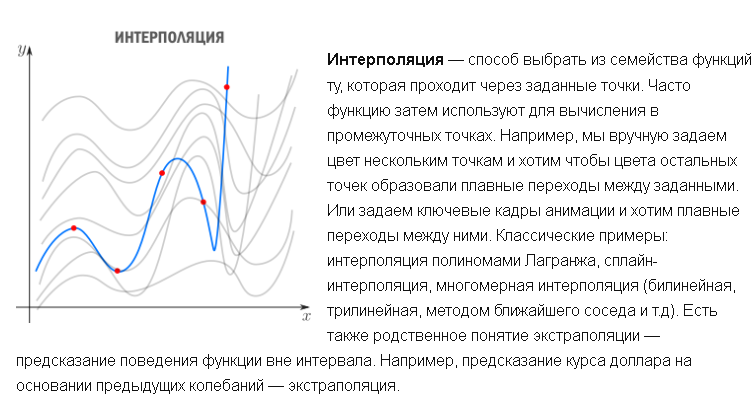

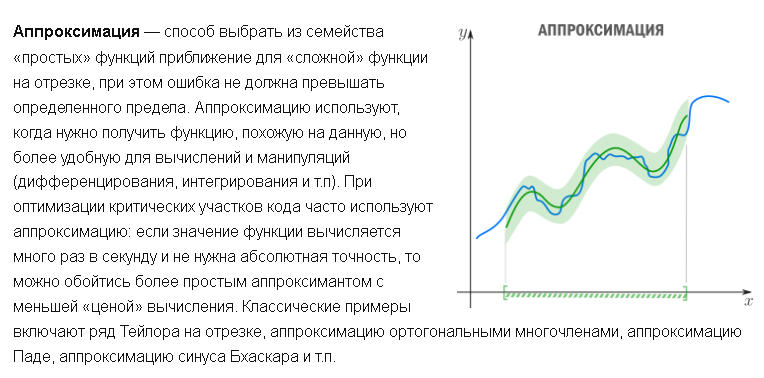

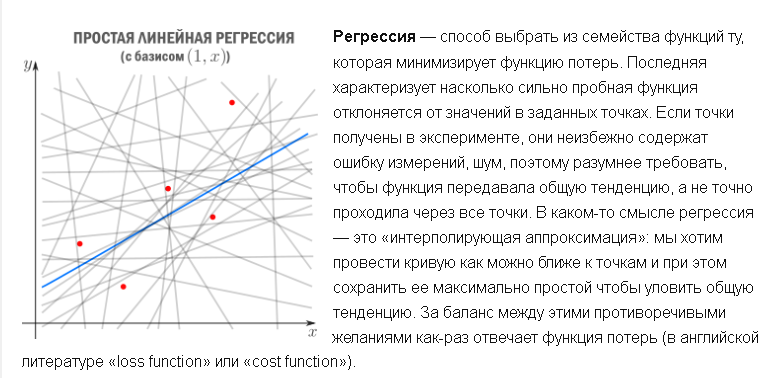

# Определение линейной регрессии

Расмматриваем линейную регрессию -> cемейство функций, из которых мы выбираем, представляет собой ***линейную комбинацию*** наперед заданных базисных функций $f_i$: $$ f = \sum_{}^{}\omega_i f_i $$

> Цель регрессии — найти коэффициенты этой линейной комбинации, и тем самым определить регрессионную функцию $f$ (которую также называют моделью). ***Линейную регрессию называют линейной именно из-за линейной комбинации базисных функций — это не связано с самыми базисными функциями (они могут быть линейными или нет).***

Линейные методы предполагают, что между признаками объекта (features) и целевой переменной (target/label) существует линейная зависимость, то есть
$$y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b, $$ где $у$ --- целевая переменная (что мы хотим предсказать), $x_i$ --- признак объекта $х$, $w_i$ --- вес $i$-го признака, $b$ --- bias (смещение, свободный член)

Часто предполагают, что объект $х$ содержит в себе фиктивный признак равный 1 для представления свободного члена $b$. В этом случае формула принимает простой вид:
$$y = \langle w, x \rangle,$$
где $\langle \cdot, \cdot \rangle$ -- скалярное произведение векторов $w, x \in \mathbb{R}^n$.

В матричной форме, в случае, когда у нас есть $n$ объектов формулу можно переписать следующим образом:
$$ Y = Xw, $$ где $Y$ -- столбец размера $n$, $X$ --- матрица признаков размера $n \times k$ (каждая строка матрицы есть описание признаков объекта), $w$ -- вектор весов размера $k$.

<hr>

# Выбор функции потерь
> Цель: определить функцию ошибки

Рассмотрим двумерный простейший случай. Пусть заданы пары точек $$ {(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)} $$

Будем искать функцию вида $ f = ax + b $ таким образом, чтобы ее график ближе всего сходился к заданным точкам.

*Как измерять расстояние от точки до прямой?*

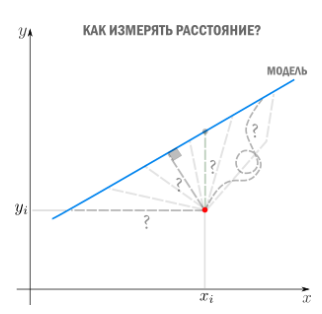

## Построение функции потерь

> Сумма модулей ошибок - LAD (Least Absolute Distance) регрессия
$$LAD(a,b) = \sum_{i=1}^{N}|y_i - (a-b x_i)|$$


> Сумма квадратов ошибок - SSE (MSE) регрессия
$$MSE(a,b) = \frac{1}{N}\sum_{i=1}^{N}(y_i - (a-b x_i))^2$$

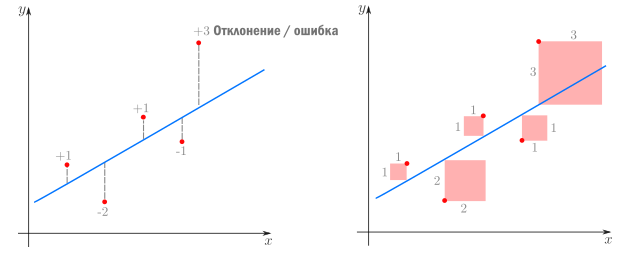

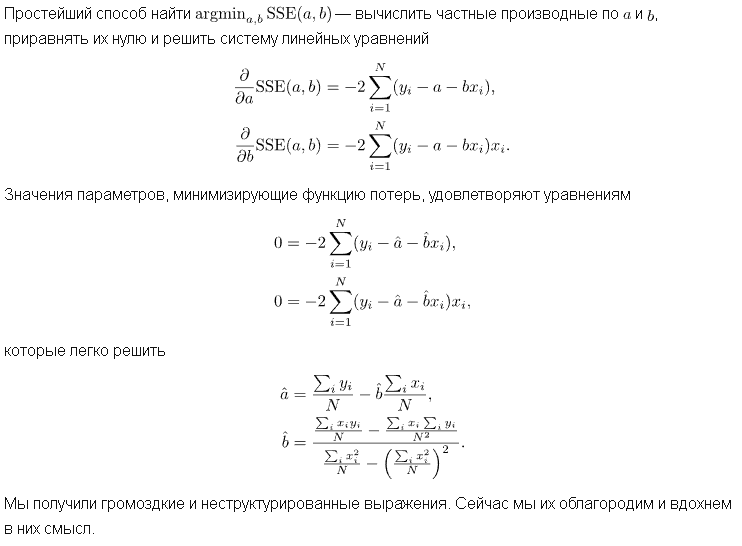

<hr>

# Линейная регрессия с точки зрения статистики. Коэффициент детерминации.

Полученные формулы для коэффициенов $\hat{a}$, $\hat{b}$ можно переписать с точки зрения статистики
$$ \hat{a} =  \langle y \rangle - \hat{b}\langle x \rangle$$
$$ \hat{b} = \frac{\langle xy \rangle - \langle x \rangle\langle y \rangle}{\langle x^2 \rangle - \langle x \rangle^2}
= 
\frac{\sigma(x,y)}{\sigma^2_x}
$$

где 

$\sigma_x$ - стандартное выборочное отклонение,

$\sigma(x, y)$ - ковариация (*мера линейной зависимости двух случайных величин*).

По значению ковариации не скажешь насколько сильно взаимосвязаны величины, так как масштаб ковариации зависит от их дисперсий. Поэтому ковариацию нормируют делением на среднеквадратические отклонения.

Коэффициент корреляции (Пирсона) $$ \rho(x,y)=\frac{\sigma(x, y)}{\sigma_x\sigma_y}$$
Тогда
$$ \hat{b} = \rho(x, y)\frac{\sigma_y}{\sigma_x} $$
Перепишем уравнение регрессивной прямой
$$y = a + bx \iff y - \langle y \rangle = \rho(x, y)\frac{\sigma_y}{\sigma_x}(x-\langle x \rangle)$$

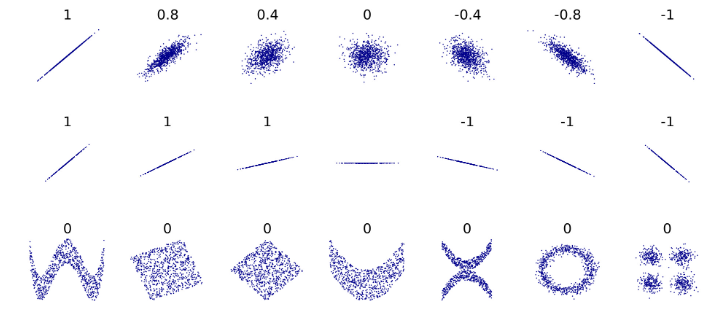

**Выводы:**

- Прямая регрессии проходит через $\langle x \rangle$ и $\langle y \rangle$

- В терминах стандартного отклонения $y$ отклоняется от своего среднего меньше, чем $x$. Это и называется регрессией (от лат. regressus — «возвращение» (по отношению к среднему))

> Этот термин в статистике впервые был использован Френсисом Гальтоном (1886) в связи с исследованием вопросов наследования физических характеристик человека. В качестве одной из характеристик был взят рост человека; при этом было обнаружено, что в целом сыновья высоких отцов, что не удивительно, оказались более высокими, чем сыновья отцов с низким ростом. Более интересным было то, что разброс в росте сыновей был меньшим, чем разброс в росте отцов. Так проявлялась тенденция возвращения роста сыновей к среднему (regression to mediocrity), то есть «регресс». Этот факт был продемонстрирован вычислением среднего роста сыновей отцов, рост которых равен 56 дюймам, вычислением среднего роста сыновей отцов, рост которых равен 58 дюймам, и т. д. После этого результаты были изображены на плоскости, по оси ординат которой откладывались значения среднего роста сыновей, а по оси абсцисс — значения среднего роста отцов. Точки (приближённо) легли на прямую с положительным углом наклона меньше 45°; важно, что регрессия была линейной

In [3]:
#@title #Correlation for a point cloud with adjustable parameters

%%html

<html>

<head>
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script> 
  <script src='https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=default'></script>

  <script type="application/javascript">

    function mean(idx) {
      var sum = 0.0;
      var num = 0;
      if (active_pt && active_pt[0] > 0 && active_pt[0] < 600 && active_pt[1] > 0 && active_pt[1] < 600) {
        sum = active_pt[idx];
        num = 1;
      }
      all_pts.forEach(function (item, index) {
          sum += item[idx];
          num += 1;
        });
      return sum / num;
    }

    function correlation(m_x, m_y) {
      cov_xy = 0.0;
      s_x2 = 0.0;
      s_y2 = 0.0;
      all_pts.forEach(function (item, index) {
          dx = item[0] - m_x;
          dy = item[1] - m_y;
          cov_xy += dx * dy;
          s_x2 += dx * dx;
          s_y2 += dy * dy;
        });
      return - cov_xy / Math.sqrt(s_x2 * s_y2);
    }


   function gaussian(x, mu, sigma) {
   	 return Math.exp(-(x - mu)*(x - mu)/sigma/sigma/2)/sigma/Math.sqrt(2 * Math.PI);
   }
   function random_point(mu, sigma) {
   	 var z = Math.sqrt(-2.0 * Math.log(Math.random())) * Math.cos(2.0 * Math.PI * Math.random());
   	 return z * sigma + mu;
   }

    var active_pt = null;
    var all_pts = [];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function regenerate() {
      var elem = document.getElementById("samples_val");
      var samples = parseInt(elem.value);
      var pos = all_pts[0];
      all_pts = [pos];
      var vx = [pos[3] - pos[0], pos[4] - pos[1]];
      var vy = [pos[5] - pos[0], pos[6] - pos[1]];
      var rx = Math.sqrt(vx[0]*vx[0] + vx[1]*vx[1]);
      var ry = Math.sqrt(vy[0]*vy[0] + vy[1]*vy[1]);
      vx = [vx[0]/rx, vx[1]/rx];
      vy = [vy[0]/ry, vy[1]/ry];
      for (var i = 0; i < samples; ++i) {
        var gaus_x = random_point(0, rx/2.0);
        var gaus_y = random_point(0, ry/2.0);
        all_pts.push([vx[0]*gaus_x + vy[0]*gaus_y + pos[0], vx[1]*gaus_x + vy[1]*gaus_y + pos[1], 0]);
      }
    }


    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos) {
      ctx.beginPath();
      if (pos[2] == 0) {
      	  ctx.fillStyle = 'rgba(128, 128, 128, 0.5)';
          ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
          ctx.fill();
      } else {
      	  ctx.fillStyle = 'rgba(0, 89, 208, 0.4)';
          ctx.fillRect(pos[0] - ptR, pos[1] - ptR, 2 * ptR, 2 * ptR);
          ctx.fillStyle = 'rgba(128, 0, 0, 1.0)';
          ctx.fillRect(pos[3] - ptR/2, pos[4] - ptR/2, ptR, ptR);
          ctx.fillRect(pos[5] - ptR/2, pos[6] - ptR/2, ptR, ptR);
          ctx.fillStyle = 'rgba(128, 0, 0, 0.1)';
          var rx = Math.sqrt((pos[4] - pos[1])*(pos[4] - pos[1]) + (pos[3] - pos[0])*(pos[3] - pos[0]));
          var ry = Math.sqrt((pos[6] - pos[1])*(pos[6] - pos[1]) + (pos[5] - pos[0])*(pos[5] - pos[0]));
          ctx.ellipse(pos[0], pos[1], rx, ry, Math.atan2(pos[4] - pos[1], pos[3] - pos[0]), 0, Math.PI * 2.0);
          ctx.fill();
      }
    }
    
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeRect(0, 0, 600, 600); // field
        
        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);
        
        if (active_pt) {
          circ(ctx, active_pt);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, item);

        });
        circ(ctx, all_pts[0]);

        if (!active_pt) {
          var temp = all_pts.shift();
          var m_x = mean(0);
          var m_y = mean(1);
          var corr = correlation(m_x, m_y);
          ctx.fillStyle = 'black';
          ctx.fillText('Correlation: ' + corr.toFixed(5), 20, 30);
          all_pts.unshift(temp);
        }

      }
    }
    
    var timer

    function mdown_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      idx = -1;
      var item = all_pts[0];
      var index = 0;
      //all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        if (item[2] == 1)
          	item[7] = 0;
        }
        if (item[2] == 1 && is_close([x,y], [item[3], item[4]])) {
        	item[7] = 1;
        	idx = index;
        }
        if (item[2] == 1 && is_close([x,y], [item[5], item[6]])) {
        	item[7] = 2;
        	idx = index;
        }
      //});
      if (idx <= -1)
          return;

    active_pt = all_pts[idx];
    all_pts.splice(idx, 1);
    }
    
    function mmove_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
      	if (active_pt[2] == 0) {
      		active_pt[0] = x;
        	active_pt[1] = y;
      	}
        if (active_pt[2] == 1) {
        	if (active_pt[7] == 0) {
            	active_pt[3] += x - active_pt[0];
            	active_pt[4] += y - active_pt[1];
            	active_pt[5] += x - active_pt[0];
            	active_pt[6] += y - active_pt[1];
            	active_pt[0] = x;
        		active_pt[1] = y;
            }
            if (active_pt[7] == 1) {
            	active_pt[3] = x;
            	active_pt[4] = y;
            	var v_x = active_pt[3] - active_pt[0];
            	var v_y = active_pt[4] - active_pt[1];
            	var r = Math.sqrt(v_x*v_x + v_y*v_y);
            	var u_x = active_pt[5] - active_pt[0];
            	var u_y = active_pt[6] - active_pt[1];
            	var R = Math.sqrt(u_x*u_x + u_y*u_y);
            	active_pt[5] = active_pt[0] - v_y / r * R;
            	active_pt[6] = active_pt[1] + v_x / r * R;
            }
            if (active_pt[7] == 2) {
            	active_pt[5] = x;
            	active_pt[6] = y;
            	var v_x = active_pt[3] - active_pt[0];
            	var v_y = active_pt[4] - active_pt[1];
            	var r = Math.sqrt(v_x*v_x + v_y*v_y);
            	var u_x = active_pt[5] - active_pt[0];
            	var u_y = active_pt[6] - active_pt[1];
            	var R = Math.sqrt(u_x*u_x + u_y*u_y);
            	active_pt[3] = active_pt[0] + u_y / R * r;
            	active_pt[4] = active_pt[1] - u_x / R * r;

            }         
        }
                
      }
    }
    
    function mup_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        //all_pts.push(active_pt);
        all_pts = [active_pt];
        active_pt = null;
        regenerate();
      }
    }
    
    function clear_field() {
      active_pt = null;
      var x = 300;
      var y = 300;
      all_pts = [[x, y, 1, x + 20, y, x, y + 20, 0]];
    }


  	function calculate()
  	{
      var elem = document.getElementById("samples_val");
      var samples = elem.value;
      elem = document.getElementById("samples_label");
      elem.innerHTML = samples;    
      regenerate();  
  	}


  </script>
</head>

<body>

  <table>
    <tr>
      <td># of samples: </td>
      <td><input type="range" class="slider" min = "0" max = "100" value="0" id="samples_val" oninput="calculate();"></td>
      <td><div id="samples_label" >0</div></td>
    </tr>
  </table>

  <canvas id="canvas" width="600" height="600" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
</body>

<script>
function init()
{
  clear_field();
  calculate();
  timer = setInterval(draw, 10);
}

init();
</script>

</html>



# of samples:,,0



> Коэффициент детерминации (показывает насколько хорого регрессионная модель описывает данные)

$$ R = \rho^2 $$

Введем определения
$$\begin{aligned}
Var_{data} = \frac{1}{N}\sum_i(y_i - \langle y \rangle)^2 \\
Var_{res} = \frac{1}{N}\sum_i(y_i - model(x_i))^2 \\
Var_{reg} = \frac{1}{N}\sum_i(model(x_i) - \langle y \rangle)^2 \\
\end{aligned}$$
$Var_{data}$ - вариация исходных данных \
$Var_{res}$ - вариация остатков (вариация отклонений от регрессионной модели) \
$Var_{reg}$ - вариация регрессии (вариация предсказаний регрессионной модели)

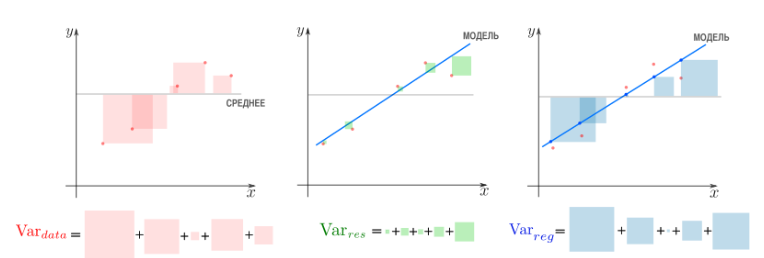

**Вариация исходных данных разлагается на сумму вариацию случайного шума (остатков) и вариацю, которая обьясняется моделью регрессии **
$$ Var_{data} = Var_{res} + Var_{reg} \iff \sigma_{data}^{2} = \sigma_{res}^{2} + \sigma_{reg}^{2}$$

**Стандартные отклонения образуют прямоугольный треугольник**

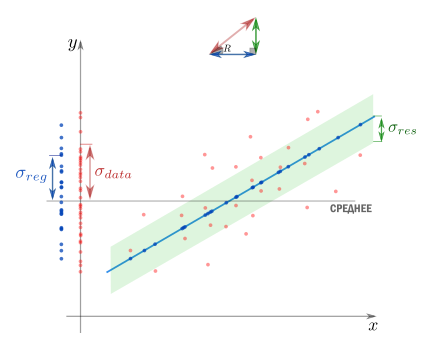

Посмотрим, насколько лучшей из линейных моделей (нашли с помощью минимизации функции потерь) удалось описать заданный набор точек.
Нас не интересует вариативность, связанная с шумом, хотим посмотреть вариативность, которая обьясняется моделью.
$$ R^2 = \frac{Var_{data} - Var_{res}}{Var_{data}} = 1 - \frac{Var_{res}}{Var_{data}} = \frac{Var_{reg}}{Var_{data}}$$

> R2 показывает какая доля вариативности в данных объясняется лучшей из линейных моделей

<hr>

In [4]:
#@title #Linear regression for a point cloud with adjustable parameters

%%html

<html>

<head>
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script> 
  <script src='https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=default'></script>

  <script type="application/javascript">

    function mean(idx) {
      var sum = 0.0;
      var num = 0;
      if (active_pt && active_pt[0] > 0 && active_pt[0] < 600 && active_pt[1] > 0 && active_pt[1] < 600) {
        sum = active_pt[idx];
        num = 1;
      }
      all_pts.forEach(function (item, index) {
          sum += item[idx];
          num += 1;
        });
      return sum / num;
    }

    function coef(m_x, m_y) {
      cov_xy = 0.0;
      s_x2 = 0.0;
      s_y2 = 0.0;
      all_pts.forEach(function (item, index) {
          dx = item[0] - m_x;
          dy = item[1] - m_y;
          cov_xy += dx * dy;
          s_x2 += dx * dx;
          s_y2 += dy * dy;
        });
      cov_xy /= all_pts.length;
      s_x2 /= all_pts.length;
      s_y2 /= all_pts.length;
      return [s_x2, cov_xy];
    }


   function gaussian(x, mu, sigma) {
   	 return Math.exp(-(x - mu)*(x - mu)/sigma/sigma/2)/sigma/Math.sqrt(2 * Math.PI);
   }
   function random_point(mu, sigma) {
   	 var z = Math.sqrt(-2.0 * Math.log(Math.random())) * Math.cos(2.0 * Math.PI * Math.random());
   	 return z * sigma + mu;
   }

    var active_pt = null;
    var all_pts = [];
    var ptR = 10.0;
    var params = null;
    var debug_txt = "";
    var bg_image = new Image();

    function regenerate() {
      var elem = document.getElementById("samples_val");
      var samples = parseInt(elem.value);
      var pos = all_pts[0];
      all_pts = [pos];
      var vx = [pos[3] - pos[0], pos[4] - pos[1]];
      var vy = [pos[5] - pos[0], pos[6] - pos[1]];
      var rx = Math.sqrt(vx[0]*vx[0] + vx[1]*vx[1]);
      var ry = Math.sqrt(vy[0]*vy[0] + vy[1]*vy[1]);
      vx = [vx[0]/rx, vx[1]/rx];
      vy = [vy[0]/ry, vy[1]/ry];
      for (var i = 0; i < samples; ++i) {
        var gaus_x = random_point(0, rx/2.0);
        var gaus_y = random_point(0, ry/2.0);
        all_pts.push([vx[0]*gaus_x + vy[0]*gaus_y + pos[0], vx[1]*gaus_x + vy[1]*gaus_y + pos[1], 0]);
      }
    }


    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos) {
      ctx.beginPath();
      if (pos[2] == 0) {
      	  ctx.fillStyle = 'rgba(128, 128, 128, 0.5)';
          ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
          ctx.fill();
      } else {
      	  ctx.fillStyle = 'rgba(0, 89, 208, 0.4)';
          ctx.fillRect(pos[0] - ptR, pos[1] - ptR, 2 * ptR, 2 * ptR);
          ctx.fillStyle = 'rgba(128, 0, 0, 1.0)';
          ctx.fillRect(pos[3] - ptR/2, pos[4] - ptR/2, ptR, ptR);
          ctx.fillRect(pos[5] - ptR/2, pos[6] - ptR/2, ptR, ptR);
          ctx.fillStyle = 'rgba(128, 0, 0, 0.1)';
          var rx = Math.sqrt((pos[4] - pos[1])*(pos[4] - pos[1]) + (pos[3] - pos[0])*(pos[3] - pos[0]));
          var ry = Math.sqrt((pos[6] - pos[1])*(pos[6] - pos[1]) + (pos[5] - pos[0])*(pos[5] - pos[0]));
          ctx.ellipse(pos[0], pos[1], rx, ry, Math.atan2(pos[4] - pos[1], pos[3] - pos[0]), 0, Math.PI * 2.0);
          ctx.fill();
      }
    }
    
    
    function draw() {
      var canvas = document.getElementById('canvas');
      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.drawImage(bg_image, 0, 0, 600, 600);
        ctx.strokeStyle = 'black';
        ctx.lineWidth = 2.0;
        ctx.strokeRect(0, 0, 600, 600); // field
        
        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);
        
        if (active_pt) {
          circ(ctx, active_pt);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, item);

        });
        circ(ctx, all_pts[0]);

        if (!active_pt) {
          var temp = all_pts.shift();
          var m_x = mean(0);
          var m_y = mean(1);
          var corr = coef(m_x, m_y);
          //ctx.fillStyle = 'black';
          //ctx.fillText('Coef: ' + corr.toFixed(5), 20, 30);
          all_pts.unshift(temp);

          if (corr && corr[0] && corr[1]) {
            //ctx.fillStyle = 'black';
            //ctx.fillText('Coef: ' + corr[0].toFixed(5) + '    ' + corr[1].toFixed(5), 20, 30);
            ctx.strokeStyle = 'blue';
            ctx.beginPath();
            ctx.moveTo(m_x - 100.0 * corr[0], m_y - 100.0 * corr[1]);
            ctx.lineTo(m_x + 100.0 * corr[0], m_y + 100.0 * corr[1]);
            ctx.stroke();          
          }

        }


      }
    }
    
    var timer

    function mdown_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      idx = -1;
      var item = all_pts[0];
      var index = 0;
      //all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        if (item[2] == 1)
          	item[7] = 0;
        }
        if (item[2] == 1 && is_close([x,y], [item[3], item[4]])) {
        	item[7] = 1;
        	idx = index;
        }
        if (item[2] == 1 && is_close([x,y], [item[5], item[6]])) {
        	item[7] = 2;
        	idx = index;
        }
      //});
      if (idx <= -1)
          return;

    active_pt = all_pts[idx];
    all_pts.splice(idx, 1);
    }
    
    function mmove_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
      	if (active_pt[2] == 0) {
      		active_pt[0] = x;
        	active_pt[1] = y;
      	}
        if (active_pt[2] == 1) {
        	if (active_pt[7] == 0) {
            	active_pt[3] += x - active_pt[0];
            	active_pt[4] += y - active_pt[1];
            	active_pt[5] += x - active_pt[0];
            	active_pt[6] += y - active_pt[1];
            	active_pt[0] = x;
        		active_pt[1] = y;
            }
            if (active_pt[7] == 1) {
            	active_pt[3] = x;
            	active_pt[4] = y;
            	var v_x = active_pt[3] - active_pt[0];
            	var v_y = active_pt[4] - active_pt[1];
            	var r = Math.sqrt(v_x*v_x + v_y*v_y);
            	var u_x = active_pt[5] - active_pt[0];
            	var u_y = active_pt[6] - active_pt[1];
            	var R = Math.sqrt(u_x*u_x + u_y*u_y);
            	active_pt[5] = active_pt[0] - v_y / r * R;
            	active_pt[6] = active_pt[1] + v_x / r * R;
            }
            if (active_pt[7] == 2) {
            	active_pt[5] = x;
            	active_pt[6] = y;
            	var v_x = active_pt[3] - active_pt[0];
            	var v_y = active_pt[4] - active_pt[1];
            	var r = Math.sqrt(v_x*v_x + v_y*v_y);
            	var u_x = active_pt[5] - active_pt[0];
            	var u_y = active_pt[6] - active_pt[1];
            	var R = Math.sqrt(u_x*u_x + u_y*u_y);
            	active_pt[3] = active_pt[0] + u_y / R * r;
            	active_pt[4] = active_pt[1] - u_x / R * r;

            }         
        }
                
      }
    }
    
    function mup_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        //all_pts.push(active_pt);
        all_pts = [active_pt];
        active_pt = null;
        regenerate();
      }
    }
    
    function clear_field() {
      active_pt = null;
      var x = 300;
      var y = 300;
      all_pts = [[x, y, 1, x + 20, y, x, y + 20, 0]];
    }


  	function calculate()
  	{
      var elem = document.getElementById("samples_val");
      var samples = elem.value;
      elem = document.getElementById("samples_label");
      elem.innerHTML = samples;    
      regenerate();  
  	}


  </script>
</head>

<body>

  <table>
    <tr>
      <td># of samples: </td>
      <td><input type="range" class="slider" min = "0" max = "100" value="0" id="samples_val" oninput="calculate();"></td>
      <td><div id="samples_label" >0</div></td>
    </tr>
  </table>

  <canvas id="canvas" width="600" height="600" 
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)"></canvas>
</body>

<script>
function init()
{
  clear_field();
  calculate();
  timer = setInterval(draw, 10);
}

init();
</script>

</html>

# of samples:,,0


In [3]:
#@title Sum of squared errors (SSE)

%%html

<html>

<head>
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script> 
  <script src='https://www.gstatic.com/external_hosted/mathjax/latest/MathJax.js?config=default'></script>

  <script type="application/javascript">


   function random_point(mu, sigma) {
     var z = Math.sqrt(-2.0 * Math.log(Math.random())) * Math.cos(2.0 * Math.PI * Math.random());
     return z * sigma + mu;
   }
   function get_samples(k, b, sigma, samples) {
    var pts = [];
     for (var i = 1; i <= samples; i++) {
       mu_x = Math.random() * 2.0 - 1.0;
       mu_y = mu_x * k + b;
       pts.push([random_point(mu_x, sigma), random_point(mu_y, sigma)]);
     }
     return pts;
   }


    function coef(m_x, m_y, all_pts) {
      cov_xy = 0.0;
      s_x2 = 0.0;
      s_y2 = 0.0;
      all_pts.forEach(function (item, index) {
          dx = item[0] - m_x;
          dy = item[1] - m_y;
          cov_xy += dx * dy;
          s_x2 += dx * dx;
          s_y2 += dy * dy;
        });
      cov_xy /= all_pts.length;
      s_x2 /= all_pts.length;
      s_y2 /= all_pts.length;
      return [s_x2, cov_xy, s_y2];
    }

   var max_x = 1.0;
   var max_y = 1.0;
   var min_x = -1.0;
   var min_y = -1.0;
   function plot_samples(samples) {
     var cell_for_plot = document.getElementById("for_left_plot");
     var pts_x = [];
     var pts_y = [];
     for (var i = 0; i < samples.length; ++i) {
      pts_x.push(samples[i][0]);
      pts_y.push(samples[i][1]);
      if (samples[i][0] > max_x)
        max_x = samples[i][0];
      if (samples[i][1] > max_y)
        max_y = samples[i][1];
      if (samples[i][0] < min_x)
        min_x = samples[i][0];
      if (samples[i][1] < min_y)
        min_y = samples[i][1];
     }
     var lambda = 0.0
     if (sig_xx > sig_xy) {
      lambda = Math.max(mu_x - min_x, max_x - mu_x) / sig_xx;
     } else {
      lambda = Math.max(mu_y - min_y, max_y - mu_y) / sig_xy;
     }

     var data = [{
           x: pts_x,
           y: pts_y,
           name: 'sampled points',
           type: 'scatter',
           mode: 'markers',
           marker: {
             size: 8,
             color: 'red',
             opacity: 0.5
           }
        },{
           x: [mu_x - lambda * sig_xx, mu_x + lambda * sig_xx],
           y: [mu_y - lambda * sig_xy, mu_y + lambda * sig_xy],
           name: 'regression line',
           type: 'scatter',
           mode: 'lines',
           marker: {
             size: 8,
             color: 'blue',
           }
        }];

     var layout = {
          title: 'Linear Regression',
          xaxis: {title: 'x'},
          yaxis: {title: 'Probability Density of x'},
          autosize: false,
          xaxis: {'domain': [0.0, 1.0], 'range': [min_x, max_x], 'fixedrange': true},
          yaxis: {'domain': [0.0, 1.0], 'range': [min_y, max_y], 'fixedrange': true},
          width: 600,
          height: 600,
          showlegend: true,
        };
     Plotly.newPlot(cell_for_plot, data, layout);
    }

    var sigma_check = false;
    var samples_arr = [];

    function error_by_kb(k, b) {
      return sig_yy + k*k*sig_xx - 2*k*sig_xy - 2*k*mu_x*mu_y + (mu_y - b)*(mu_y - b) + (k*mu_x + b)*(k*mu_x + b) - b*b;
    }

    var k_min = -2.0;
    var k_max = 2.0;
    var b_min = -1.0;
    var b_max = 1.0;
    function loss_function_3d() {
      var k_arr = [];
      for (var k = k_min; k < k_max; k+= 0.01)
        k_arr.push(k);
      var b_arr = [];
      for (var b = b_min; b < b_max; b+= 0.1)
        b_arr.push(b);
      var err = [];
      for (var i = 0; i < b_arr.length; ++i) {
        var b = b_arr[i];
        var temp = [];
        for (var j = 0; j < k_arr.length; ++j) {
          var k = k_arr[j];
          var e = error_by_kb(k, b);
          temp.push(e);
        }
        err.push(temp);
      }
            
        var data = [{
          x: k_arr,
          y: b_arr,
          z: err, 
          showscale: false, 
          opacity: 0.9, 
          type: 'surface'
        }];
        if (sig_xx > 0.00001) {
          var k_opt = sig_xy / sig_xx;
          var b_opt = mu_y - mu_x * k_opt;
          var e_opt = error_by_kb(k_opt, b_opt);
          data.push({
            x: [k_opt],
            y: [b_opt],
            z: [e_opt], 
            name: 'best approximation',
            mode: 'markers',
            marker: {
              size: 12,
              opacity: 1.0,
              color: 'rgba(0.0, 0.0, 0.5, 1.0)'
            },
            type: 'scatter3d'
          });
        }
        data.push({
          x: [0],
          y: [0],
          z: [error_by_kb(0.0, 0.0)], 
          name: 'test approximation',
          mode: 'markers',
          marker: {
            size: 12,
            opacity: 0.8
          },
          type: 'scatter3d'
        });

        var cell_for_plot = document.getElementById("for_right_plot");
        var layout = {
            title: 'Error Function',
            scene: {
              xaxis: {title: 'k'},
              yaxis: {title: 'b'},
              autosize: false,
              width: 600,
              height: 600
            },
            showlegend: true,
          };
      Plotly.newPlot(cell_for_plot, data, layout);
    }

    function update_3d(k, b) {
      var cell_for_plot = document.getElementById("for_right_plot");
      Plotly.deleteTraces(cell_for_plot, [2]);
      if (k < k_min || k > k_max || b < b_min || b > b_max) {
        k = null;
        b = null;
      }
      var data = [{
          x: [k],
          y: [b],
          z: [error_by_kb(k, b)], 
          name: 'test approximation',
          mode: 'markers',
          marker: {
            size: 12,
            opacity: 0.8
          },
          type: 'scatter3d'
        }];
      Plotly.addTraces(cell_for_plot, data);
    }

    function loss_function_2d() {
      var k_arr = [];
      for (var k = k_min; k < k_max; k+= 0.01)
        k_arr.push(k);
      var b_arr = [];
      for (var b = b_min; b < b_max; b+= 0.1)
        b_arr.push(b);
      var err = [];
      for (var i = 0; i < b_arr.length; ++i) {
        var b = b_arr[i];
        var temp = [];
        for (var j = 0; j < k_arr.length; ++j) {
          var k = k_arr[j];
          var e = error_by_kb(k, b);
          temp.push(e);
        }
        err.push(temp);
      }
            
        var data = [{
          x: k_arr,
          y: b_arr,
          z: err, 
          showscale: false, 
          opacity: 0.9, 
          type: 'contour'
        }];
        if (sig_xx > 0.00001) {
          var k_opt = sig_xy / sig_xx;
          var b_opt = mu_y - mu_x * k_opt;
          var e_opt = error_by_kb(k_opt, b_opt);
          data.push({
            x: [k_opt],
            y: [b_opt],
            name: 'best approximation',
            mode: 'markers',
            marker: {
              size: 12,
              opacity: 1.0,
              color: 'rgba(0.0, 0.0, 0.5, 1.0)'
            },
            type: 'scatter'
          });
        }
        data.push({
          x: [0],
          y: [0],
          name: 'test approximation',
          mode: 'markers',
          marker: {
            size: 12,
            opacity: 0.8
          },
          type: 'scatter'
        });

        var cell_for_plot = document.getElementById("for_right_plot");
        var layout = {
            title: 'Error Function',
            xaxis: {'domain': [0.0, 1.0], 'range': [k_min, k_max], 'fixedrange': true},
            yaxis: {'domain': [0.0, 1.0], 'range': [b_min, b_max], 'fixedrange': true},
            width: 600,
            height: 600,
            showlegend: true,
          };
      Plotly.newPlot(cell_for_plot, data, layout);
    }

     function update_2d(k, b) {
      var cell_for_plot = document.getElementById("for_right_plot");
      Plotly.deleteTraces(cell_for_plot, [2]);
      if (k < k_min || k > k_max || b < b_min || b > b_max) {
        k = null;
        b = null;
      }
      var data = [{
          x: [k],
          y: [b],
          name: 'test approximation',
          mode: 'markers',
          marker: {
            size: 12,
            opacity: 0.8
          },
          type: 'scatter'
        }];
      Plotly.addTraces(cell_for_plot, data);
    }


    var mu_x = 0.0;
    var mu_y = 0.0;
    var sig_xx = 0.0;
    var sig_xy = 0.0;
    var sig_yy = 0.0;
    function update_globals(samples) {
      mu_x = 0.0;
      mu_y = 0.0;
      for (var i = 0; i < samples.length; ++i) {
        mu_x += samples[i][0];
        mu_y += samples[i][1];
     }
     mu_x /= samples.length;
     mu_y /= samples.length;
     C = coef(mu_x, mu_y, samples);
     sig_xx = C[0];
     sig_xy = C[1];
     sig_yy = C[2];
    }

    function calculate()
    {
      elem = document.getElementById("samples_val");
      var samples = elem.value;
      elem = document.getElementById("samples_label");
      elem.innerHTML = samples;

      var smp = samples_arr.slice(0, samples);
      update_globals(smp);
      plot_samples(smp);

      var canvas = document.getElementById("paint_left");
      left_point = [0.0, canvas.height / 2.0];
      right_point = [canvas.width, canvas.height / 2.0];

      if (sigma_check) {
        loss_function_3d();
        var canvas = document.getElementById("paint_right");
        canvas.style.cssText = "position:absolute; top:0px"
                            + "px; left: 0px"
                            + "px; width: 0px"
                            + "px; height: 0px"
                            + "px; z-index: 0;";
        canvas.width = 0;
        canvas.height = 0;
      } else {
        loss_function_2d();
        var cell_for_plot = document.getElementById("for_right_plot");
        var el = cell_for_plot.getElementsByClassName("gridlayer")[0];
        var rect = el.getBoundingClientRect();
        var canvas = document.getElementById("paint_right");
        canvas.style.cssText = "position:absolute; top:" + rect.top
                            + "px; left: " + rect.left
                            + "px; width:" + rect.width
                            + "px; height:" + rect.height
                            + "px; z-index:1000;";
        canvas.width = rect.width;
        canvas.height = rect.height;
      }
      draw();
    }

    function update_line(x, y) {
      var canvas = document.getElementById("paint_right");
      var w = canvas.width;
      var h = canvas.height;
      var k = k_min + x / w * (k_max - k_min);
      var b = b_min + (h - y) / h * (b_max - b_min);
      update_2d(k, b);
      canvas = document.getElementById("paint_left");
      w = canvas.width;
      h = canvas.height;
      var pt_l = [-1, -k + b];
      var pt_r = [1, k + b];
      pt_l = [(pt_l[0] - min_x) / (max_x - min_x) * w, h - (pt_l[1] - min_y) / (max_y - min_y) * h];
      pt_r = [(pt_r[0] - min_x) / (max_x - min_x) * w, h - (pt_r[1] - min_y) / (max_y - min_y) * h];
      left_point = cross_point(pt_r, pt_l, w, h);
      right_point = cross_point(pt_l, pt_r, w, h);      
    }

    var line_changing = false;
    function right_down(evt)
    {
      var x = evt.offsetX;
      var y = evt.offsetY;
      update_line(x, y);
      line_changing = true;
      draw();
    }

    function right_move(evt) {
      if (!line_changing)
        return;
      var x = evt.offsetX;
      var y = evt.offsetY;
      update_line(x, y);     
      draw(); 
    }

    function right_up(evt) {
      line_changing = false; 
      draw();
    }

    function show_sigma()
    {
        var checkBox = document.getElementById("show_sigma");

        if (checkBox.checked == true){
          sigma_check = true;
        } else {
          sigma_check = false;
        }
        calculate();
    }

    function generate_samples() {
      samples_arr = get_samples(0.5, 0.0, 0.1, 20);
      calculate();
    }

    var active_state = 0; // 0 -none, 1 - left, 2 - right, 3 - center
    var left_point = [0.0, 0.0]
    var right_point = [0.0, 0.0]

    function draw() {
      var canvas = document.getElementById("paint_left");
      var ctx = canvas.getContext('2d');
      ctx.clearRect(0, 0, canvas.width, canvas.height);
      ctx.strokeStyle = "#00FF00";
      ctx.lineWidth = 3;
      ctx.globalAlpha = 0.5;
      //ctx.setLineDash([5, 15]);
      ctx.beginPath();
      ctx.moveTo(left_point[0], left_point[1]);
      ctx.lineTo(right_point[0], right_point[1]);
      ctx.stroke();
      ctx.globalAlpha = 1.0;
      //ctx.fillStyle="#00FF00";
      //ctx.fillRect(0, 0, canvas.width, canvas.height); // field
    }

  function mdown_handle(evt) {
    var x = evt.offsetX;
    var y = evt.offsetY;
    var vec = [left_point[0] - right_point[0], left_point[1] - right_point[1]];
    var lng = Math.sqrt(vec[0]*vec[0] + vec[1]*vec[1]);
    vec = [vec[0] / lng, vec[1] / lng];
    var u = [x - right_point[0], y - right_point[1]];
    var proj_paral = u[0] * vec[0] + u[1] * vec[1];
    var proj_perp = Math.sqrt(u[0]*u[0] + u[1]*u[1] - proj_paral*proj_paral);
    if (proj_perp > 10.0)
      return;
    proj_paral = Math.abs(proj_paral);
    if (proj_paral < lng / 3.0)
      active_state = 2;
    if (proj_paral > 2.0 * lng / 3.0)
      active_state = 1;
    if (proj_paral > lng / 3.0 && proj_paral < 2.0 * lng / 3.0)
      active_state = 3;
    draw();
  }
      
  function cross_point(A, B, w, h) {
    var u = [A[0] / w, A[1] / h];
    var v = [(B[0] - A[0]) / w, (B[1] - A[1]) / h];
    var lambda_1 = 1.0;
    if (v[0]*v[0] > 0.00001) {
      lambda_1 = Math.max(-u[0] / v[0], (1-u[0]) / v[0]);
    }
    var lambda_2 = 1.0;
    if (v[1]*v[1] > 0.00001) {
      lambda_2 = Math.max(-u[1] / v[1], (1-u[1]) / v[1]);
    }
    var lambda = Math.min(lambda_1, lambda_2);
    var p = [u[0] + lambda * v[0], u[1] + lambda * v[1]];
    return [p[0] * w, p[1] * h];
  }

  function mmove_handle(evt) {
    if (active_state == 0)
        return;
    var x = evt.offsetX;
    var y = evt.offsetY;
    var canvas = document.getElementById("paint_left");
    var w = canvas.width;
    var h = canvas.height;
    if (active_state == 1) { // move left point
      left_point = cross_point(right_point, [x, y], w, h);
    }
    if (active_state == 2) {
      right_point = cross_point(left_point, [x, y], w, h);
    }
    if (active_state == 3) {
      var v = [left_point[0] - right_point[0], left_point[1] - right_point[1]];
      left_point = cross_point([x, y], [v[0]+x, v[1]+y], w, h);
      right_point = cross_point([x, y], [-v[0]+x, -v[1]+y], w, h);
    }

    var plot_x1 = min_x + left_point[0] / w * (max_x - min_x);
    var plot_y1 = min_y + (h - left_point[1]) / h * (max_y - min_y);
    var plot_x2 = min_x + right_point[0] / w * (max_x - min_x);
    var plot_y2 = min_y + (h - right_point[1]) / h * (max_y - min_y);
    var k = (plot_y2 - plot_y1) / (plot_x2 - plot_x1);
    var b = plot_y1 - k * plot_x1;

    if (sigma_check) {
      update_3d(k, b);  
    } else {
      update_2d(k, b);
    }
    draw();
    
  }
      
  function mup_handle(evt) {
    active_state = 0;
    draw();
  }

  </script>
</head>

<body>
<canvas id="paint_left"
  onmousedown="mdown_handle(event)"
  onmousemove="mmove_handle(event)"
  onmouseup="mup_handle(event)"></canvas>
<canvas id="paint_right"
  onmousedown="right_down(event)"
  onmousemove="right_move(event)"
  onmouseup="right_up(event)"></canvas>


<div id="everything" style="height:600px; width:1200px;">
  <table>
    <tr>
      <td><button onclick="generate_samples()">Generate Samples</button></td>
      <td># of samples: </td>
      <td><input type="range" class="slider" min = "2" max = "20" value="3" id="samples_val" oninput="calculate();"></td>
      <td><div id="samples_label" >3</div></td>
      <td>3D: <input type="checkbox" id="show_sigma" onclick="show_sigma()"/></td>
    </tr>
  </table>

  <div id="for_left_plot" style="position:absolute; top:100px; left:0px; height:600px; width:600px;"> </div>
  <div id="for_right_plot" style="position:absolute; top:100px; left:600px; height:600px; width:600px;"> </div>
</div>
</body>

<script>
function init()
{
  generate_samples();
  var el = document.getElementsByClassName("gridlayer")[0];
  var rect = el.getBoundingClientRect();
  var canvas = document.getElementById("paint_left");
  canvas.style.cssText = "position:absolute; top:" + rect.top
                      + "px; left: " + rect.left
                      + "px; width:" + rect.width
                      + "px; height:" + rect.height
                      + "px; z-index:1000;";
  canvas.width = rect.width;
  canvas.height = rect.height;
  var ctx = canvas.getContext('2d');
  ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
  left_point = [0.0, canvas.height / 2.0];
  right_point = [canvas.width, canvas.height / 2.0];

  draw();
  
  //timer = setInterval(draw, 200);
}
init();
</script>

</html>


Generate Samples,# of samples:,,3,3D:


# Линейная регрессия с точки зрения теории вероятностей. Метод максимального правдоподобия

**Парная и множественная регрессия**
- В частном случае, когда признак (фича) единственнен (без учета константы), то говорят о парной или простейшей регрессии
- Когда количество факторов (без учета константы) больше одного, то говорят о множественной регрессии

Пусть значения $x$ известны точно, а в измерении $y$ есть шумю. Положим, что все отклонения от прямой вызваны шумом с постоянным распределением.
$$ y = a + bx + \varepsilon $$

$\varepsilon$ - нормально распределенная случайная величина

$$ \varepsilon \sim \mathcal{N}(0, \sigma^2) $$
Плотность вероятности:
$$ p(\varepsilon) = \frac{1}{\sqrt{2 \pi \sigma^2}}exp({-\frac{\varepsilon^2}{2\sigma^2})}$$
**Теорема Гаусса - Маркова**

Рассматривается модель парнйо регрессии, в которой наблюдения $ Y $ связаны с $X$ зависимостью $Y_i = \beta_1 + \beta_2X + \varepsilon_i$. На основе $n$ выборочных наблюдений оценивается уравнение регрессии $\hat{Y} = \hat{\beta_1} + \hat{\beta_2}X_i$.

*Теорема Гаусса - Маркова* гласит, что 
Если данные обладают следующими свойствами:
- матожидание случайных ошибок равно нулю $\forall i E[\varepsilon_i]=0$
- дисперсия случайных ошибок одинакова и конечна $\forall i Var(\varepsilon_i) = \sigma^2 < \inf$
- случайные ошибки не скоррелированы $\forall i \neq j: Cov(\varepsilon_i, \varepsilon_j)=0$
(на самом деле их [больше](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%B0_%E2%80%94_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D0%B0#GM1))

Тогда оценки метода наименьших квадратов **оптимальны** в классе линейных несмещенных оценок



**Метод максимального правдоподобия**

> У нас есть $N$ независимых одинаково распределенных случайных величин (СВ). Знаем вид распределения. Мы не знаем параметры распределения ($\mu, \sigma$), но хотим их определить. Для этого вычислим вероятность получить $N$ датапоинтов в предположении постоянных ($\mu, \sigma$). Измерения независимы $\rightarrow$ получим произведение вероятностей каждого измерения. (*посмотрим насколько правдоподобно значение параметров ($\mu, \sigma$) при известном событии N*)

**Правдоподобие позволяет сравнить несколько вероятностных распределений с разными параметрами и оценить в контексте какого из них наблюдаемые события наиболее вероятны.**

Запишем функцию правдоподобия для нашей регрессионной модели

$$ P(Y|X, a, b) \sim \prod\limits_{i = 1}P(y_i|x_i, a,b) \sim \prod\limits_{i = 1} (a + bx_i + \mathcal{N}(0, \sigma^2)) \sim\prod\limits_{i = 1} \mathcal{N}(a + bx_i, \sigma^2)$$

Что это занчит?

> Мы предположили что правило по которому генерировалась выборка следущее: на прямой $a + bx$ выбирается $x$, при этом фиксированном $x$ строится нормальный шум $\mathcal{N}(0, \sigma^2)$ b так получается наблюдение $y$.


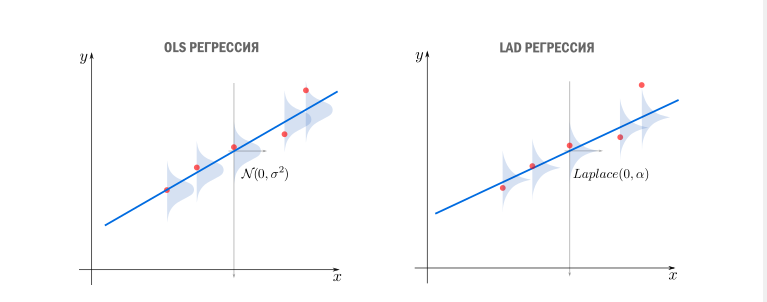

построим оценку для $a,b = \omega_{ml}$

$$ \omega_{ml} = argmaxP(Y|\omega, X) = argmax(\prod\limits_{i=1} \frac{1}{\sqrt{2\pi\sigma^2}exp(-\frac{(y_i - a - bx_i)^2}{2\sigma^2})}) = argmax(\frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{\sum_{i=1}(y_i - a - bx_i)^2}{2\sigma^2})) = \frac{1}{\sqrt{2\pi\sigma^2}}exp(-
\frac{SSE(a, b)}{w\sigma^2})$$

Максимизировать произведение неудобно, прологарифмируем выражение (делать это можно, тк логарифм - возрастающая функция)

$$ \log(\omega_{ml}) = - SSE(a,b) + const$$

> Таким образом аксимизация функции правдоподобия достигается при минимуме SSE (MSE)

*Если принять, что распредеелние ошибок имеет распределение Лапласа*

$$ \varepsilon \sim Laplace(0, \alpha) $$
$$ p_L(\varepsilon, \mu, \alpha) = \frac{\alpha}{2}\exp{-\alpha\varepsilon - \mu||} $$

То получим функцию потерь для LAD (Least absolute distance) регрессии 
$$ E_{LAD} =  \sum_{i}|y_i - a -bx_i|$$

> LAD устойчив к выбросам в данных,не придает большой вес выбросам как MSE, который возводит остатки в квадрат. Однако, поиск минимума LAD не является стабильным (производная модуля не определена), функция потерь не является выпуклой и может иметь несколько минимумов.

<hr>

# Разложение ошибки на смещение и разброс (Bias-variance decomposition)

**Итак, мы выяснили, что:**

- Существует "закон природы" $f(\vec{x})$, который мы хотим предсказать

- Существуют фактические значения целевой переменной (считаем что фактические значение это и есть закон природы, но с погрещностью (которая распределена определенный образом) в замере): $$ $y = f(\vec{x}) + \varepsilon$

- Ошибка распределена нормально с центром в нуле и некоторым разбросом $\varepsilon \sim \mathcal{N}(0, \sigma^2)$

- Фактическое значение целевой переменной распределено нормально $y \sim \mathcal{N}(f(\vec{x}), \sigma^2)$

- Мы пытаемся аппроксимировать "закон природы" $f(\vec{x})$ линейной функцией от регрессоров $\hat{f}(\vec{x})$

Тогда ошибка раскладывается следующи образом:
$$ Err(\vec{x}) = E[(y - \hat{f}(\vec{x}))^2] = E[y^2] + E[\hat{f^2}(\vec{x})] - 2E[y\hat{f}(\vec{x})]$$
Распишем, используя формулу
$$ Var(y) = E[y^2] - E^2[y]$$

$$ E[y^2] = Var(y) + E^2[y] = \sigma^2 + E^2[f+\varepsilon] = \sigma^2 + E^2[f]$$
$$ E[\hat{f}^2] = Var(\hat{f}) + E^2[\hat{f}] $$
$$ E[y\hat{f}] = E[(f+\varepsilon)\hat{f}] = E[f\hat{f}] + E[\varepsilon \hat{f}] = fE[\hat{f}] + E[\varepsilon]E[\hat{f}]= fE[\hat{f}] $$
Соберем все вместе
$$ Err(\vec{x}) = \sigma^2 + f^2 + Var(\hat{f}) + E^2[\hat{f}] - 2fE[\hat{f}] = (f - E[\hat{f}])^2 + Var(\hat{f}) + \sigma^2 = Bias^2(\hat{f}) + Var{\hat{f}} + \sigma^2 $$

**Вывод**: ошибка прогноза любой модели вида $y=f(\hat{x}) + \varepsilon$ складывается из

- квадрата смещения ($Bias(\hat{f})=E^2[f-\hat{f}]$) - можно рассматривать как ошибку, вызванную упрощением предположений, приянтых в методе. Вообще, это погрешность оценки, возникающая в результате ошибочного предположения в алгоритме обучения. Например, в результате большого смещения алгоритм может связть между фичами и таргетом (**недообучение**).
> Смещение характеризует способность алгоритма настраиваться на целевую зависимость.

- Разброса ($Var(\hat{f})$) - дисперсия ответов алгоритма. При высокой дисперсии алгоритм может принять шум в тренировочных данных за истинную зависимость, что на самом деле не всегда так (**переобучение**)
> Разброс характеризует разнообразие алгоритмов.

- Неустранимой ошибки $\sigma^2=Var(y)$.
> С этой ошибкой мы ничего поделать не можем, она будет неизбежно, т.к. в эмпирический замерах всегда будет погрешность измерения прибора.

> Таким образом, ошибка раскладывается на три составляющие. Последняя связанна с шумом в данных, а две другие с используемой моделью.

**Проведем аналогию, что алгоритм - игрок в дартс**

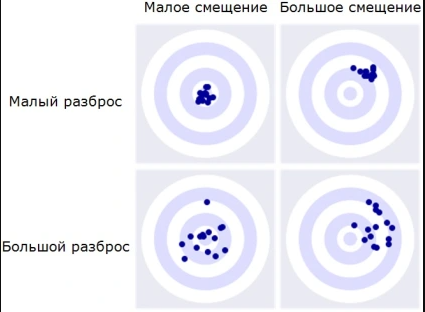

При увеличении сложности модели, увеличивается дисперсия (разброс) ответов алгоритма, но уменьшается смещение. По причине того, что тренировочный набор полностью запоминается вместо обобщения, небольшие изменения приводят к неожиданным результатам (**переобучение**).
Если же модель не в состоянии выучить закономерность, то получаем большое смещение (**недообучение**)

> Вернемся к теореме Гаусса-Маркова.

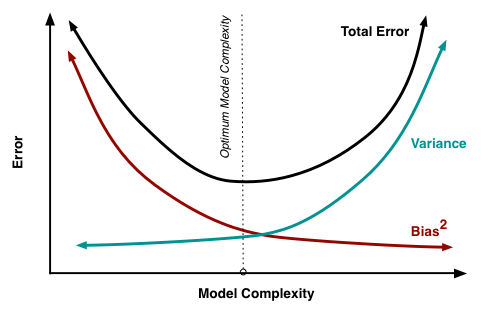

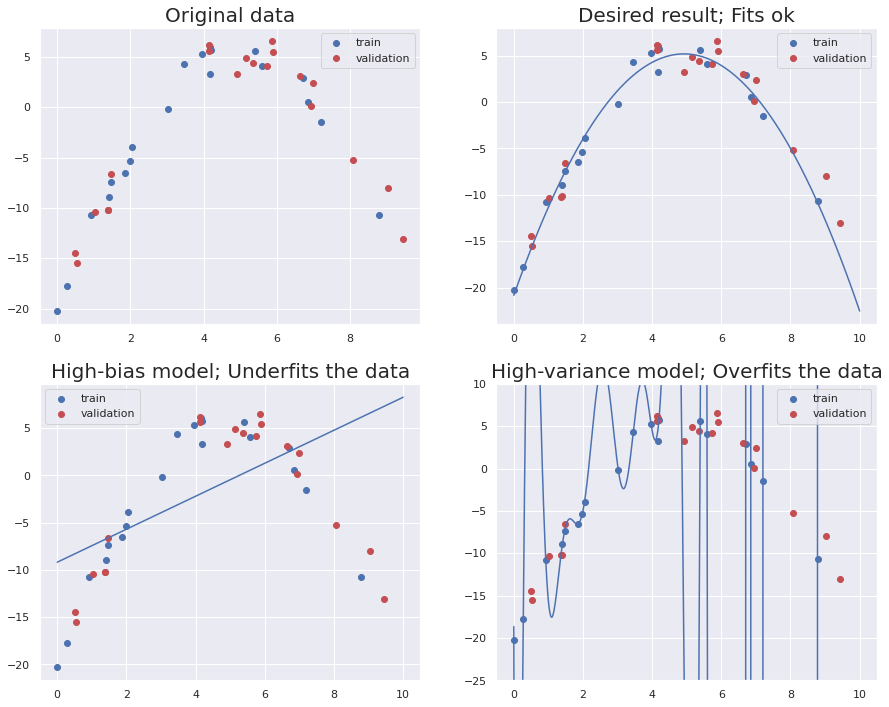

In [6]:
#@title Недообучение и переобучение
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

rng = np.random.RandomState(1)
x = 10 * rng.rand(20)
y = 5 - (5-x)**2 + rng.randn(20)*1.5
xv = 10 * rng.rand(20)
yv = 5 - (5-xv)**2 + rng.randn(20)*1.5
plt.figure(figsize=(15,12))
plt.subplot(2, 2, 1)
plt.title("Original data", fontdict={'size':20})
plt.scatter(x, y, c='b', label='train');
plt.scatter(xv, yv, c='r', label='validation');
plt.legend(loc='best')


from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.subplot(2, 2, 3)
plt.title("High-bias model; Underfits the data", fontdict={'size':20})
plt.scatter(x, y, c='b', label='train');
plt.scatter(xv, yv, c='r', label='validation');
plt.legend(loc='best')
plt.plot(xfit, yfit);

model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(x[:, np.newaxis], y)
yfit = model.predict(xfit[:, np.newaxis])

plt.subplot(2, 2, 2)
plt.title("Desired result; Fits ok", fontdict={'size':20})
plt.scatter(x, y, c='b', label='train');
plt.scatter(xv, yv, c='r', label='validation');
plt.legend(loc='best')
plt.plot(xfit, yfit);

P = np.polyfit(x, y, 50, full=True)
yfit = np.polyval(P[0], xfit)

plt.subplot(2, 2, 4)
plt.title("High-variance model; Overfits the data", fontdict={'size':20})
plt.scatter(x, y, c='b', label='train');
plt.scatter(xv, yv, c='r', label='validation');
plt.legend(loc='best')
plt.ylim(-25, 10)
plt.plot(xfit, yfit);


# Математический анализ и линейная алгебра. Мультилинейная регрессия.

Расмматриваем линейную регрессию -> cемейство функций, из которых мы выбираем, представляет собой ***линейную комбинацию*** наперед заданных базисных функций $f_i$: $$ f = \sum_{}^{}\omega_i f_i $$

> Цель регрессии — найти коэффициенты этой линейной комбинации, и тем самым определить регрессионную функцию $f$ (которую также называют моделью). ***Линейную регрессию называют линейной именно из-за линейной комбинации базисных функций — это не связано с самыми базисными функциями (они могут быть линейными или нет).***

Линейные методы предполагают, что между признаками объекта (features) и целевой переменной (target/label) существует линейная зависимость, то есть
$$y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b, $$ где $у$ --- целевая переменная (что мы хотим предсказать), $x_i$ --- признак объекта $х$, $w_i$ --- вес $i$-го признака, $b$ --- bias (смещение, свободный член)

Часто предполагают, что объект $х$ содержит в себе фиктивный признак равный 1 для представления свободного члена $b$. В этом случае формула принимает простой вид:
$$y = \langle w, x \rangle,$$
где $\langle \cdot, \cdot \rangle$ -- скалярное произведение векторов $w, x \in \mathbb{R}^n$.

В матричной форме, в случае, когда у нас есть $m$ объектов формулу можно переписать следующим образом:
$$ Y = Xw, $$ где $Y$ -- столбец размера $n$, $X$ --- матрица признаков размера $n \times k$ (каждая строка матрицы есть описание признаков объекта), $w$ -- вектор весов размера $k$.

**Функция ошибок (лосс):** 
$$\begin{aligned}
L(y_{pred}, Y) &= \frac{1}{n}||y_{pred} - Y||^2_2 =\\
&= \frac{1}{n}||Xw - Y||^2_2 = \frac{1}{n}\sum_{i=1}^{n}\left(\sum_{j=1}^{m} x_{ij}w_j - y_i\right)^2 =: L(w)
\end{aligned}
$$

**Нмного про системы линейных алгебраических уравнений**

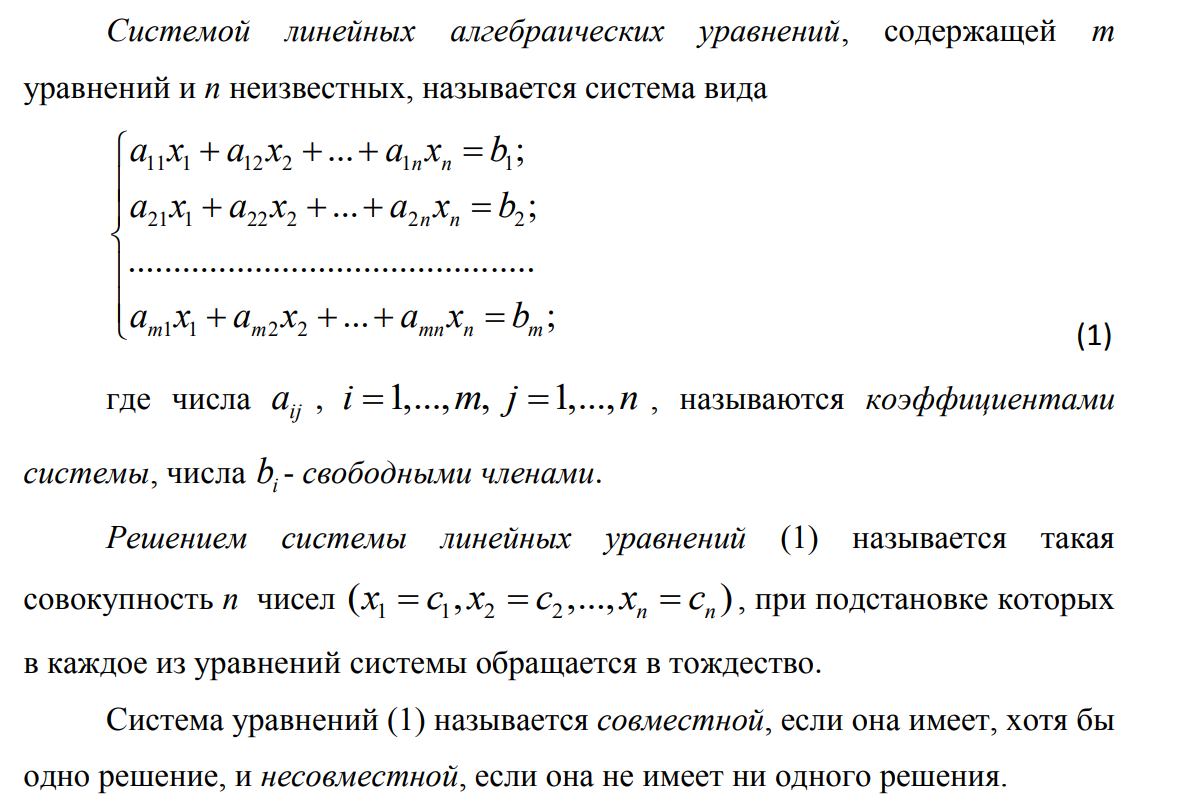

> **Решить систему - выяснить, совместна она или нет. Если совмесна, то найти ее решение.**

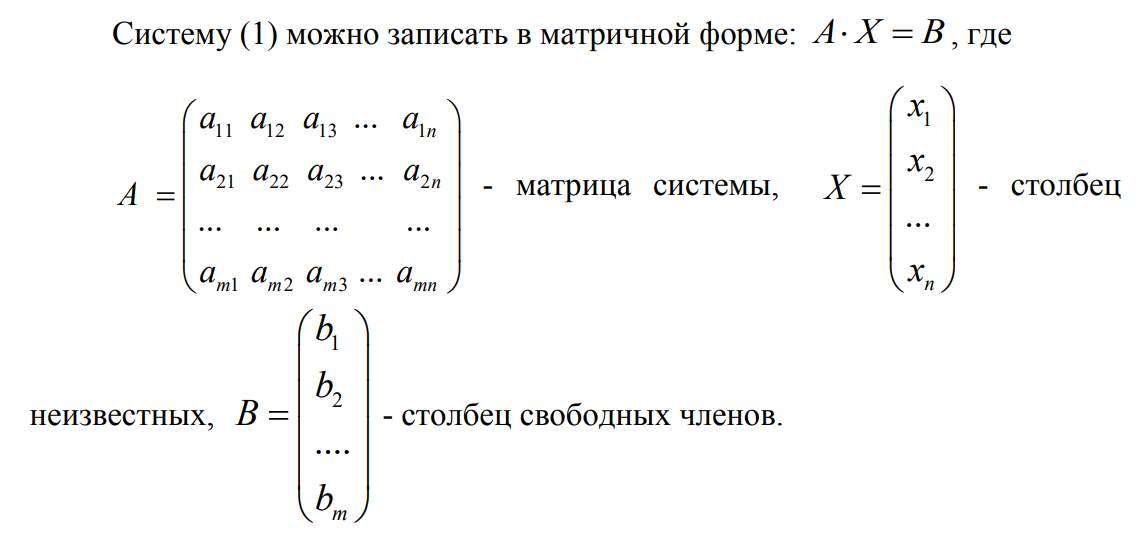

> **Если определитель системы отличен от нуля, то система называется неворожденной.**

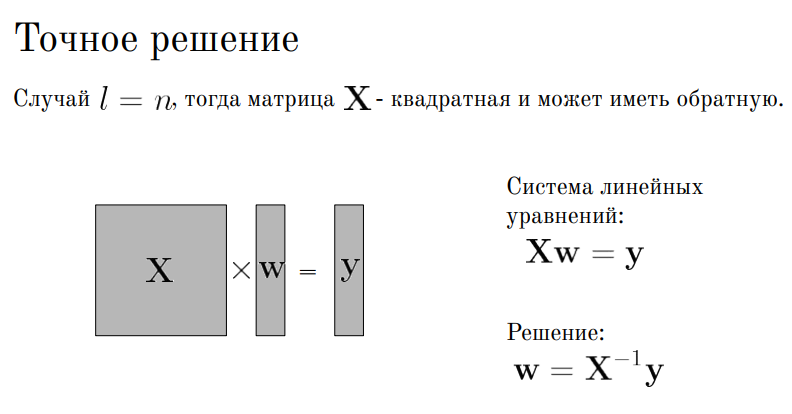

> В случае, когда уравнений (наблюдений, обьектов, строк матрицы) больше, чем неизвестных (признаков, столбцов матрицы), тогда система называется переопределенной. **Почти всегда переопределенная система не имеет точного решения.**

По это причине ввели другое понятие для решения переопределенной СЛАУ.

Введем невязку 

$$ r = \omega X - Y $$

Для точного решения требовалость $r=0$. Назовем решением переопределенной системы такое значение X для которого невязка минимальна. Такое решение называется решением по **методу наименьших квадратов**

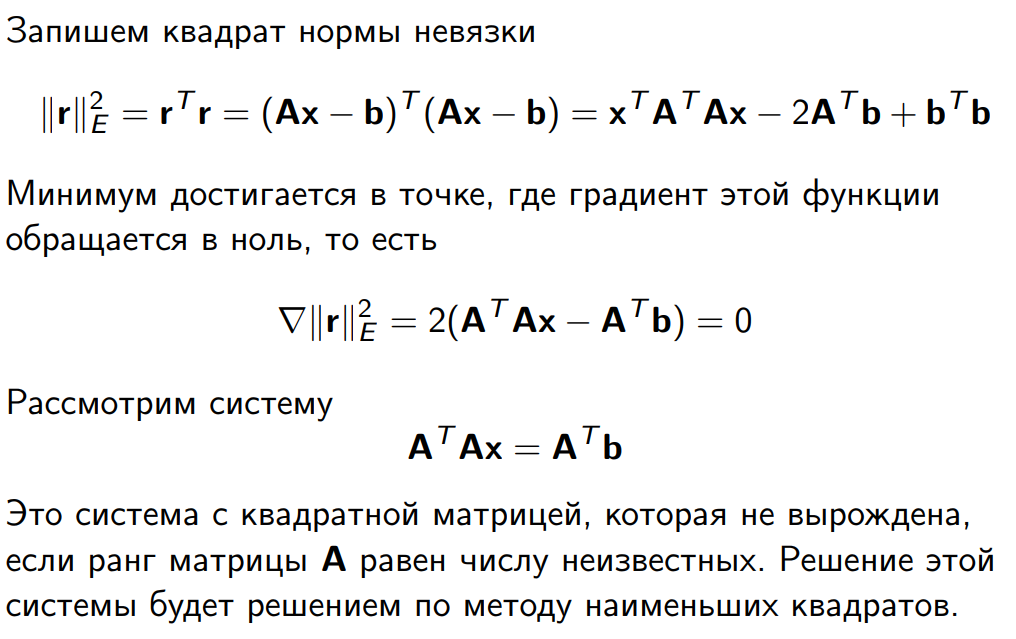

> Методом наименьших квадратов можно искать наилучшие коэффициенты и нелинейных [зависимостях](http://compmathgroup.github.io/compmath-slides/old/LSQ.pdf).

> $A^TA$  - ковариционная матрциа признаков

В отсутствие идеально скоррелированных фич (об этом в разделе регуляризация)

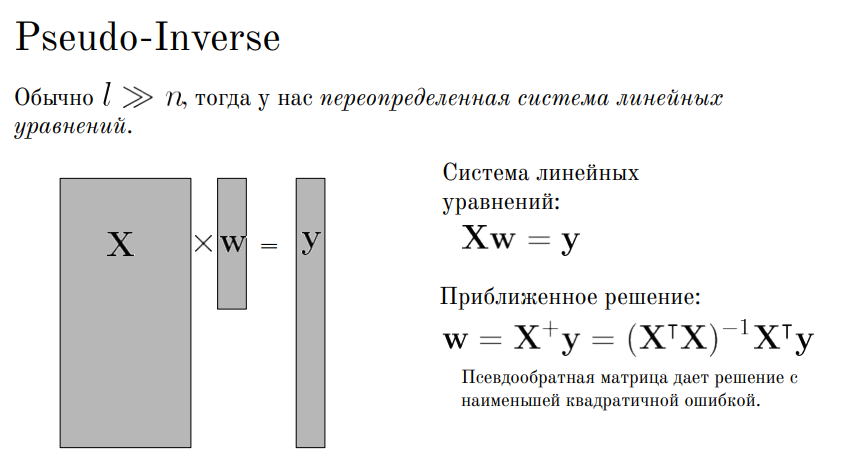

**Псевдообращение можно понимать как наилучшую апроксимацию (по методу наименьших квадратов) решения соответствующей системы линейных [уравнений](http://www.machinelearning.ru/wiki/index.php?title=%D0%A0%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BF%D0%B5%D1%80%D0%B5%D0%BE%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%91%D0%BD%D0%BD%D0%BE%D0%B9_%D0%A1%D0%9B%D0%90%D0%A3)**

## Аналитическое решение

Минимизация ошибки по методу наименьших квадратов дает решение: $$ w = (X^TX)^{-1}X^TY $$

Реализуем класс линейной регрессии с помощью этой формулы.

In [ ]:
class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        # Не забудьте про фиктивный признак равный 1
        
        n, k = X.shape
        
        X_train = X
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y

        return self
        
    def predict(self, X):
        # Принимает на вход X и возвращает ответы модели
        # Не забудьте про фиктивный признак равный 1
        n, k = X.shape
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        y_pred = X_train @ self.w

        return y_pred
    
    def get_weights(self):
        return self.w

## Тестирование
Сначала сгенерируем искусственные данные для теста моделей

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def linear_expression(x):
    return 5 * x + 6

In [ ]:
# по признакам сгенерируем значения таргетов с некоторым шумом
objects_num = 50
X = np.linspace(-5, 5, objects_num)
y = linear_expression(X) + np.random.randn(objects_num) * 5

# выделим половину объектов на тест
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

Нанесем точки выборки и зависимость на график для наглядности

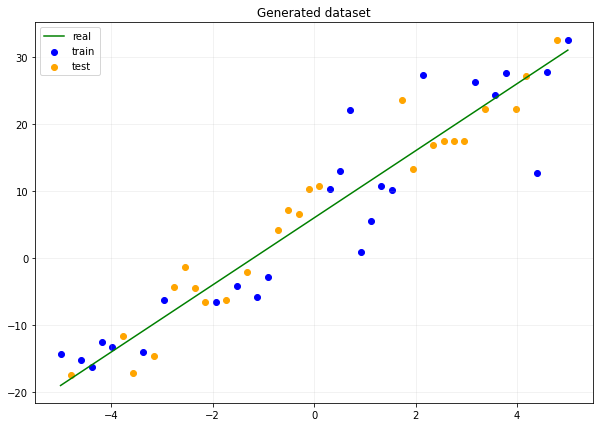

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', c='g')
plt.scatter(X_train, y_train, label='train', c='b')
plt.scatter(X_test, y_test, label='test', c='orange')

plt.title("Generated dataset")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

Обучим модель на трейне и предскажем результаты на тесте

In [ ]:
regressor = MyLinearRegression()

regressor.fit(X_train[:, np.newaxis], y_train)

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()
w

array([4.80628283, 5.77035683])

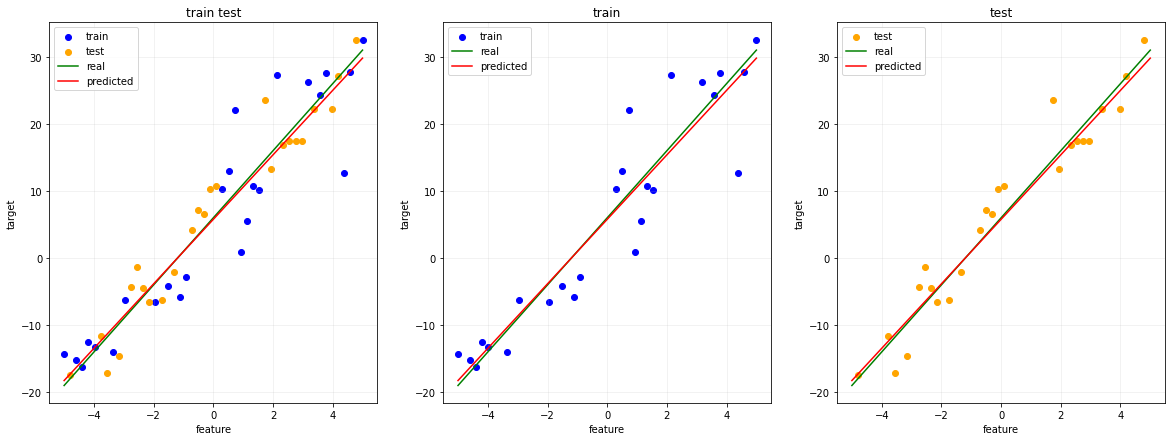

In [ ]:
plt.figure(figsize=(20, 7))

ax = None

for i, types in enumerate([['train', 'test'], ['train'], ['test']]):
    ax = plt.subplot(1, 3, i + 1, sharey=ax)
    if 'train' in types:
        plt.scatter(X_train, y_train, label='train', c='b')
    if 'test' in types:
        plt.scatter(X_test, y_test, label='test', c='orange')

    plt.plot(X, linear_expression(X), label='real', c='g')
    plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

    plt.ylabel('target')
    plt.xlabel('feature')
    plt.title(" ".join(types))
    plt.grid(alpha=0.2)
    plt.legend()

plt.show()

Сравним с реализацией из sklearn

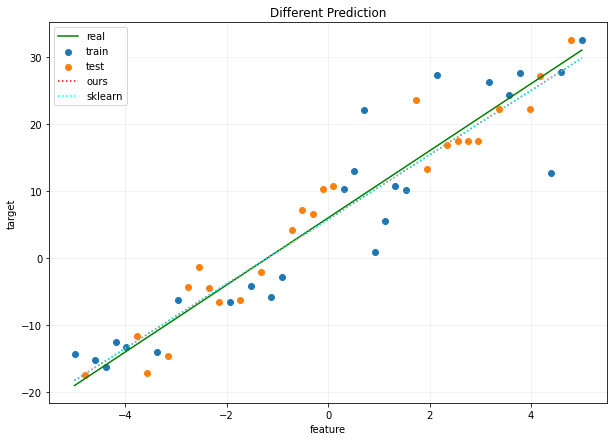

In [ ]:
sk_reg = LinearRegression().fit(X_train[:, np.newaxis], y_train)

plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='ours', c='r', linestyle=':')
plt.plot(X, sk_reg.predict(X[:, np.newaxis]), label='sklearn', c='cyan', linestyle=':')

plt.title("Different Prediction")
plt.ylabel('target')
plt.xlabel('feature')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

#### Результаты

In [ ]:
from sklearn.metrics import mean_squared_error

train_predictions = regressor.predict(X_train[:, np.newaxis])
test_predictions = regressor.predict(X_test[:, np.newaxis])

print('Train MSE: ', mean_squared_error(y_train, train_predictions))
print('Test MSE: ', mean_squared_error(y_test, test_predictions))

Train MSE:  32.50302160379081
Test MSE:  12.370105334322073


### 1.2. Градиентная оптимизация

Обращение матрицы -- очень долгая операция. Кроме того, обратная матрица $(X^TX)^{-1}$ не всегда существует. По этим причинам, мы воспользуемся методом градиентного спуска для оптимизации эмпирического риска.

Градиентый спуск заключается в 
1. расчете $\displaystyle\frac{\partial{L}}{\partial{w}}$ -- градиента ошибки (значение целевой функции, то есть лосса $L(y_{pred}, y_{true})$) от значения параметров модели (весов $w$)
2. шаге спуска -- изменении весов $w$ в сторону антиградиента с некоторым коэффициентом $h$ (он же learning rate):
$$w := w - h\frac{\partial{L}}{\partial{w}}$$
3. Повторении п.1 и п.2 пока не наблюдается сходимость (изменения ошибки малы или отсутсвуют)

Как правило, чаще используют стохастический градиентный спуск (SGD): выбирают случайный элемент обучающей выборки и изменяют коэффициенты модели по направлению антиградиента функции потерь на этом примере.

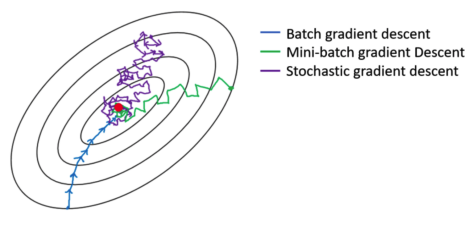

**Цель:** Реализуем новые классы линейной регрессии, в которой оптимизация проводится методами градиентного спуска.

**Предполагаемая зависимость:** $Y = Xw$, где $Y \in \mathbb{R}^{n\times 1}, X \in \mathbb{R}^{n\times m}, w \in \mathbb{R}^{m\times 1}$


**Минимизируемая функция:**
$$
L(y_{pred}, Y) = \frac{1}{n} ||y_{pred} - Y||^2 = \frac{1}{n}||Xw - Y||^2 = \frac{1}{n}(Xw - Y)^T(Xw - Y) = \frac{1}{n}(w^TX^TXw - 2Y^TXw + Y^TY)
$$

**Градиент w.r.t. $w$:**
$$
\frac{\partial{L}}{\partial{w}} = \frac{2}{n}(X^TXw - X^TY) = \frac{2}{n}X^T(y_{pred} - Y) \,\, \in \mathbb{R}^{m \times 1}
$$

In [ ]:
#@title ##Dataflow in GD, SGD and batch SGD
%%html

<div id="slide_1" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="150mm" height="100mm" version="1.1" viewBox="0 0 253.24 142.99" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs>
  <linearGradient id="linearGradient924" x1="140.3" x2="228.23" y1="99.352" y2="97.679" gradientUnits="userSpaceOnUse">
   <stop stop-color="#ea4036" offset="0"/>
   <stop stop-color="#007cff" stop-opacity=".25379" offset="1"/>
  </linearGradient>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.9234 -18.849)">
  <g fill="#0068ff" fill-opacity=".17046" fill-rule="evenodd" stroke="#005ba4" stroke-width=".30503">
   <rect x="228.1" y="33.33" width="25.723" height="10.696"/>
   <rect x="228.1" y="44.026" width="25.723" height="10.696"/>
   <rect x="228.1" y="54.723" width="25.723" height="10.696"/>
   <rect x="228.1" y="65.419" width="25.723" height="10.696"/>
   <rect x="228.1" y="76.115" width="25.723" height="10.696"/>
   <rect x="228.1" y="86.811" width="25.723" height="10.696"/>
   <rect x="228.1" y="97.508" width="25.723" height="10.696"/>
   <rect x="228.1" y="108.2" width="25.723" height="10.696"/>
   <rect x="228.1" y="118.9" width="25.723" height="10.696"/>
   <rect x="228.1" y="129.6" width="25.723" height="10.696"/>
   <rect x="228.1" y="140.29" width="25.723" height="10.696"/>
   <rect x="228.1" y="150.99" width="25.723" height="10.696"/>
  </g>
  <rect x="9.9234" y="76.164" width="113.42" height="46.223" fill="#f00" fill-opacity=".17046" fill-rule="evenodd"/>
  <g>
   <text x="15.652633" y="103.81685" fill="#000000" font-family="sans-serif" font-size="10.583px" stroke-width=".265" style="line-height:1.25" xml:space="preserve"><tspan x="15.652633" y="103.81685" fill="#000000" fill-opacity=".8" font-family="'Courier New'" font-weight="bold" stroke-width=".265">Gradient descent</tspan></text>
   <path d="m228.1 33.33-2e-5 128.35c-20.784-28.357-27.189-60.237-92.031-62.277 64.78-3.5617 67.876-18.979 92.031-66.078z" fill="url(#linearGradient924)"/>
   <path d="m140.3 99.352c7e-3 -0.34292 0.0781-2.1259 2.5932-3.8917-7.1273 2.2385-11.299 2.6226-18.671 3.5375 7.98 0.47043 11.995 1.8386 18.737 3.9012-2.5664-1.8119-2.6719-3.2188-2.6593-3.5471z" fill="#ea4036"/>
   <text x="220.37071" y="24.510101" fill="#000000" font-family="sans-serif" font-size="8.9383px" stroke-width=".22346" style="line-height:1.25" xml:space="preserve"><tspan x="220.37071" y="24.510101" fill="#000000" fill-opacity=".61364" font-family="'Courier New'" font-weight="bold" stroke-width=".22346">data set</tspan></text>
  </g>
 </g>
</svg>

</div>

<div id="slide_2" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="150mm" height="100mm" version="1.1" viewBox="0 0 253.24 142.99" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs>
  <linearGradient id="linearGradient924-8-5" x1="140.3" x2="228.23" y1="99.352" y2="97.679" gradientTransform="translate(4.6812e-6 -2.0128e-5)" gradientUnits="userSpaceOnUse">
   <stop stop-color="#ea4036" offset="0"/>
   <stop stop-color="#007cff" stop-opacity=".25379" offset="1"/>
  </linearGradient>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.9234 -18.849)">
  <g fill="#0068ff" fill-opacity=".17046" fill-rule="evenodd" stroke="#005ba4" stroke-width=".30503">
   <rect x="228.1" y="33.33" width="25.723" height="10.696"/>
   <rect x="228.1" y="44.026" width="25.723" height="10.696"/>
   <rect x="228.1" y="54.723" width="25.723" height="10.696"/>
   <rect x="228.1" y="65.419" width="25.723" height="10.696"/>
   <rect x="228.1" y="76.115" width="25.723" height="10.696"/>
   <rect x="228.1" y="86.811" width="25.723" height="10.696"/>
   <rect x="228.1" y="97.508" width="25.723" height="10.696"/>
   <rect x="228.1" y="108.2" width="25.723" height="10.696"/>
   <rect x="228.1" y="118.9" width="25.723" height="10.696"/>
   <rect x="228.1" y="129.6" width="25.723" height="10.696"/>
   <rect x="228.1" y="140.29" width="25.723" height="10.696"/>
   <rect x="228.1" y="150.99" width="25.723" height="10.696"/>
  </g>
  <rect x="9.9234" y="76.164" width="113.42" height="46.223" fill="#f00" fill-opacity=".17046" fill-rule="evenodd"/>
  <text x="220.37071" y="24.510101" fill="#000000" font-family="sans-serif" font-size="8.9383px" stroke-width=".22346" style="line-height:1.25" xml:space="preserve"><tspan x="220.37071" y="24.510101" fill="#000000" fill-opacity=".61364" font-family="'Courier New'" font-weight="bold" stroke-width=".22346">data set</tspan></text>
  <text x="16.228331" y="97.292061" fill="#000000" fill-opacity=".8" font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="16.228331" y="97.292061">Stochastic</tspan><tspan x="16.228331" y="110.6046">gradient descent</tspan></text>
  <path d="m228.1 54.723v10.696c-17.95 24.56-27.189 36.029-92.031 33.989 64.78-3.5617 71.089-12.895 92.031-44.685z" fill="url(#linearGradient924-8-5)"/>
  <path d="m140.3 99.352c7e-3 -0.34292 0.0781-2.1259 2.5932-3.8917-7.1273 2.2385-11.299 2.6226-18.671 3.5375 7.98 0.47043 11.995 1.8386 18.737 3.9012-2.5664-1.8119-2.6719-3.2188-2.6593-3.5471z" fill="#ea4036"/>
 </g>
</svg>

</div>

<div id="slide_3" style="display:none; max-width:750px">
<?xml version="1.0" encoding="UTF-8"?>
<svg width="150mm" height="100mm" version="1.1" viewBox="0 0 253.24 142.99" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink">
 <defs>
  <linearGradient id="linearGradient924-8-6" x1="140.3" x2="228.1" y1="99.352" y2="108.2" gradientTransform="translate(.092111 2.0728)" gradientUnits="userSpaceOnUse">
   <stop stop-color="#ea4036" offset="0"/>
   <stop stop-color="#007cff" stop-opacity=".25379" offset="1"/>
  </linearGradient>
 </defs>
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-9.9234 -18.849)">
  <g fill="#0068ff" fill-opacity=".17046" fill-rule="evenodd" stroke="#005ba4" stroke-width=".30503">
   <rect x="228.1" y="33.33" width="25.723" height="10.696"/>
   <rect x="228.1" y="44.026" width="25.723" height="10.696"/>
   <rect x="228.1" y="54.723" width="25.723" height="10.696"/>
   <rect x="228.1" y="65.419" width="25.723" height="10.696"/>
   <rect x="228.1" y="76.115" width="25.723" height="10.696"/>
   <rect x="228.1" y="86.811" width="25.723" height="10.696"/>
   <rect x="228.1" y="97.508" width="25.723" height="10.696"/>
   <rect x="228.1" y="108.2" width="25.723" height="10.696"/>
   <rect x="228.1" y="118.9" width="25.723" height="10.696"/>
   <rect x="228.1" y="129.6" width="25.723" height="10.696"/>
   <rect x="228.1" y="140.29" width="25.723" height="10.696"/>
   <rect x="228.1" y="150.99" width="25.723" height="10.696"/>
  </g>
  <rect x="9.9234" y="76.164" width="113.42" height="46.223" fill="#f00" fill-opacity=".17046" fill-rule="evenodd"/>
  <g fill="#000000">
   <text x="220.37071" y="24.510101" font-family="sans-serif" font-size="8.9383px" stroke-width=".22346" style="line-height:1.25" xml:space="preserve"><tspan x="220.37071" y="24.510101" fill="#000000" fill-opacity=".61364" font-family="'Courier New'" font-weight="bold" stroke-width=".22346">data set</tspan></text>
   <text x="16.228331" y="97.292061" fill-opacity=".8" font-family="'Courier New'" font-size="10.583px" font-weight="bold" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="16.228331" y="97.292061">Batch stochastic</tspan><tspan x="16.228331" y="110.6046">gradient descent</tspan></text>
   <text x="16.279287" y="97.337059" font-family="sans-serif" font-size="10.583px" stroke-width=".26458" style="line-height:1.25" xml:space="preserve"><tspan x="16.279287" y="97.337059" fill="#000000" fill-opacity=".8" font-family="'Courier New'" font-weight="bold" stroke-width=".26458"/></text>
  </g>
  <path d="m228.19 67.492v32.089c-18.517 3.3932-27.189 3.9408-92.031 1.9002 64.78-3.5617 65.23-10.325 92.031-33.989z" fill="url(#linearGradient924-8-6)"/>
  <path d="m140.39 101.42c7e-3 -0.34291 0.0781-2.1259 2.5932-3.8916-7.1273 2.2385-11.299 2.6226-18.671 3.5375 7.98 0.47044 11.995 1.8386 18.737 3.9012-2.5664-1.8119-2.6719-3.2188-2.6593-3.5471z" fill="#ea4036"/>
 </g>
</svg>


</div>

<div style="position:absolute; top:50px; left:900px;">

<div id="arrow_left" style="border-width: 1px; border-style:solid; float:left; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect x="38.564" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m45.796 34.331h-5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.068 34.267 2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m40.069 34.396 2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

<div id="arrow_right" style="border-width: 1px; border-style:solid; float:right; height:32px;">
<svg width="8.7464mm" height="8.7464mm" version="1.1" viewBox="0 0 8.7464 8.7464" xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
<metadata>
<rdf:RDF>
<cc:Work rdf:about="">
<dc:format>image/svg+xml</dc:format>
<dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
<dc:title/>
</cc:Work>
</rdf:RDF>
</metadata>
<g transform="translate(-38.564 -29.908)">
<rect transform="scale(-1,1)" x="-47.31" y="29.908" width="8.7464" height="8.7464" fill-opacity=".16425" opacity=".97" stroke-miterlimit="10.433" stroke-width="0"/>
<path d="m40.078 34.331h5.8931" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.806 34.267-2.7141-2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
<path d="m45.805 34.396-2.7141 2.4238" fill="none" stroke="#fff" stroke-opacity=".98068" stroke-width=".5"/>
</g>
</svg>
</div>

</div>

<style>
#arrow_left:hover{color:blue;}
#arrow_right:hover{color:blue;}
</style>

<script  type="text/javascript">
var slides = ["slide_1", "slide_2", "slide_3"];
var left_btn_id = "arrow_left";
var right_btn_id = "arrow_right";
var current_slide = 0;

function slide_left()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide -= 1;
  if (current_slide < 0) {current_slide = 0;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

function slide_right()
{
  var old_slide = document.getElementById(slides[current_slide]);
  current_slide += 1;
  if (current_slide >= slides.length) {current_slide = slides.length - 1;}
  var new_slide = document.getElementById(slides[current_slide]);
  old_slide.style.display='none';
  new_slide.style.display='block';
}

document.getElementById(left_btn_id).addEventListener("click", slide_left);
document.getElementById(right_btn_id).addEventListener("click", slide_right);
document.getElementById(slides[current_slide]).style.display='block';
</script>

SyntaxError: invalid syntax (Temp/ipykernel_15040/3560880420.py, line 4)

In [ ]:
class MyGradientLinearRegression(MyLinearRegression):
    def __init__(self, **kwargs):
        super().__init__(**kwargs) # передает именные параметры родительскому конструктору
        self.w = None
    
    def fit(self, X, y, lr=0.01, max_iter=100):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        # Не забудьте про фиктивный признак равный 1!

        n, k = X.shape

        # случайно инициализируем веса
        if self.w is None:
            self.w = np.random.randn(k + 1 if self.fit_intercept else k)
        
        X_train = np.hstack((X, np.ones((n, 1)))) if self.fit_intercept else X
        
        self.losses = []
        
        for iter_num in range(max_iter):
            y_pred = self.predict(X)
            self.losses.append(mean_squared_error(y_pred, y))

            grad = self._calc_gradient(X_train, y, y_pred)

            assert grad.shape == self.w.shape, f"gradient shape {grad.shape} is not equal weight shape {self.w.shape}"
            self.w -= lr * grad

        return self

    def _calc_gradient(self, X, y, y_pred):
        grad = 2 * (y_pred - y)[:, np.newaxis] * X
        grad = grad.mean(axis=0)
        return grad

    def get_losses(self):
        return self.losses

#### Тестирование

Посчитаем предсказания на сгенерированном датасете

In [ ]:
regressor = MyGradientLinearRegression(fit_intercept=True)

l = regressor.fit(X_train[:, np.newaxis], y_train, max_iter=100).get_losses()

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

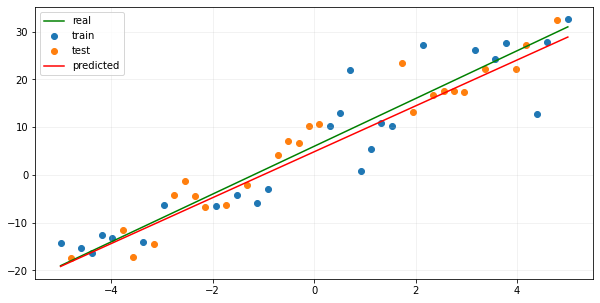

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

Построим таккже график лосса во время обучения

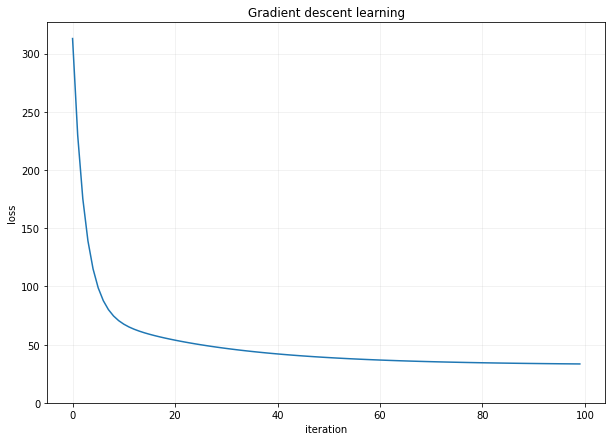

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(l)

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.ylim(bottom=0)
plt.grid(alpha=0.2)

plt.show()

### 1.3 SGD

Добавим к нашему градиентному спуску сэмплирование мини-батча, по которому будем считать градиент


In [ ]:
class MySGDLinearRegression(MyGradientLinearRegression):
    def __init__(self, n_sample=10, **kwargs):
        super().__init__(**kwargs) # передает именные параметры родительскому конструктору
        self.w = None
        self.n_sample = n_sample

    def _calc_gradient(self, X, y, y_pred):
        # Главное отличие в SGD - это использование подвыборки для шага оптимизации
        inds = np.random.choice(np.arange(X.shape[0]), size=self.n_sample, replace=False)
        
        grad = 2 * (y_pred[inds] - y[inds])[:, np.newaxis] * X[inds]
        grad = grad.mean(axis=0)

        return grad

#### Тестирование

Проведем аналогичный расчет на сгенерированном датасете

In [ ]:
regressor = MySGDLinearRegression(fit_intercept=True)

l = regressor.fit(X_train[:, np.newaxis], y_train, max_iter=100).get_losses()

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

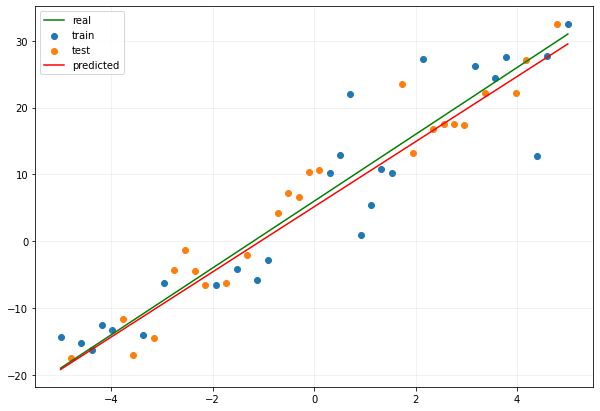

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

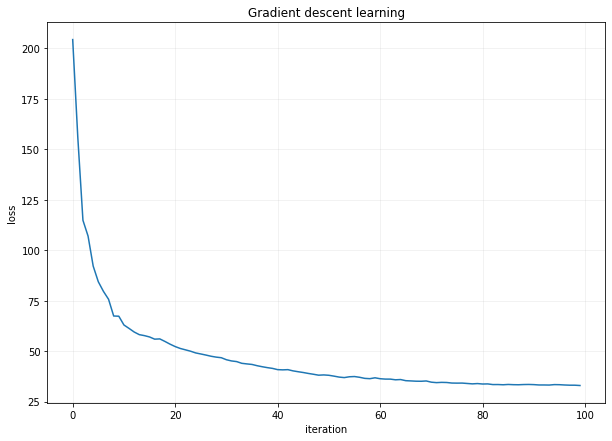

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(l)

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.grid(alpha=0.2)
plt.show()

Протестируем меняя количество элементов для расчета градиента

In [ ]:
n_samples = [1, 2, 4]

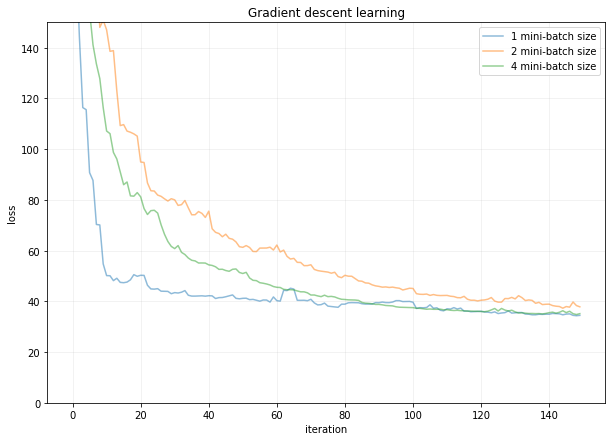

In [ ]:
plt.figure(figsize=(10, 7))

for ns in n_samples:
    l = MySGDLinearRegression(fit_intercept=True, n_sample=ns).fit(
        X_train[:, np.newaxis],
        y_train,
        lr=5e-3,
        max_iter=150,
    ).get_losses()
    plt.plot(l, alpha=0.5, label=f'{ns} mini-batch size')

plt.title('Gradient descent learning')
plt.ylabel('loss')
plt.xlabel('iteration')

plt.legend()
plt.ylim((0, 150))
plt.grid(alpha=0.2)
plt.show()

Как видно по графикам размер подвыборки влияет на стабильность сходимости (чем меньше, тем больше и резче изменения весов).
При этом количество итераций для минимизации примерно одинаково.

SGD также обычно улучшают адаптивным уменьшением величины шага. (подробнее в курсах про методы оптимизаций итп)


# Регуляризация

**Проблема мультиколлениарности**


### [Сингулярное разложение матрицы](http://www.machinelearning.ru/wiki/images/archive/a/a2/20150324082130!Voron-ML-regression-slides.pdf)

>Сингулярное разложение является удобным методом при работе с матрицами. Оно показывает геометрическую структуру матрицы и позволяет наглядно представить имеющиеся данные.
SVD позволяет вычислять обратные и псевдообратные матрицы большого размера, что делает его полезным инструментом при решении задач регрессионного анализа.

Произвольная матрица $l \times n$ представима в виде сингулярного разложения (singular value decomposition, SVD)
$$ F = VDU^T$$

**Основные свойства** сингулярного разложения:

- $l\times n$ - матрица $V=(v_1, ..., v_n)$ ортагональна, $V^TV=I_n$, стобцы $v_j$ - собственные векторы матрциы $FF^T$

- $l\times n$ - матрица $U=(u_1, ..., u_n)$ ортагональна, $U^TU=I_n$, стобцы $u_j$ - собственные векторы матрциы $F^TF$

- $n\times n$ - матрица $D=diag\sqrt{(\lambda_1}, ..., \sqrt{\lambda_n})$ диагональна, $\lambda_j >= 0$ - собственные значения матрци $F^TF$ и $FF^T$

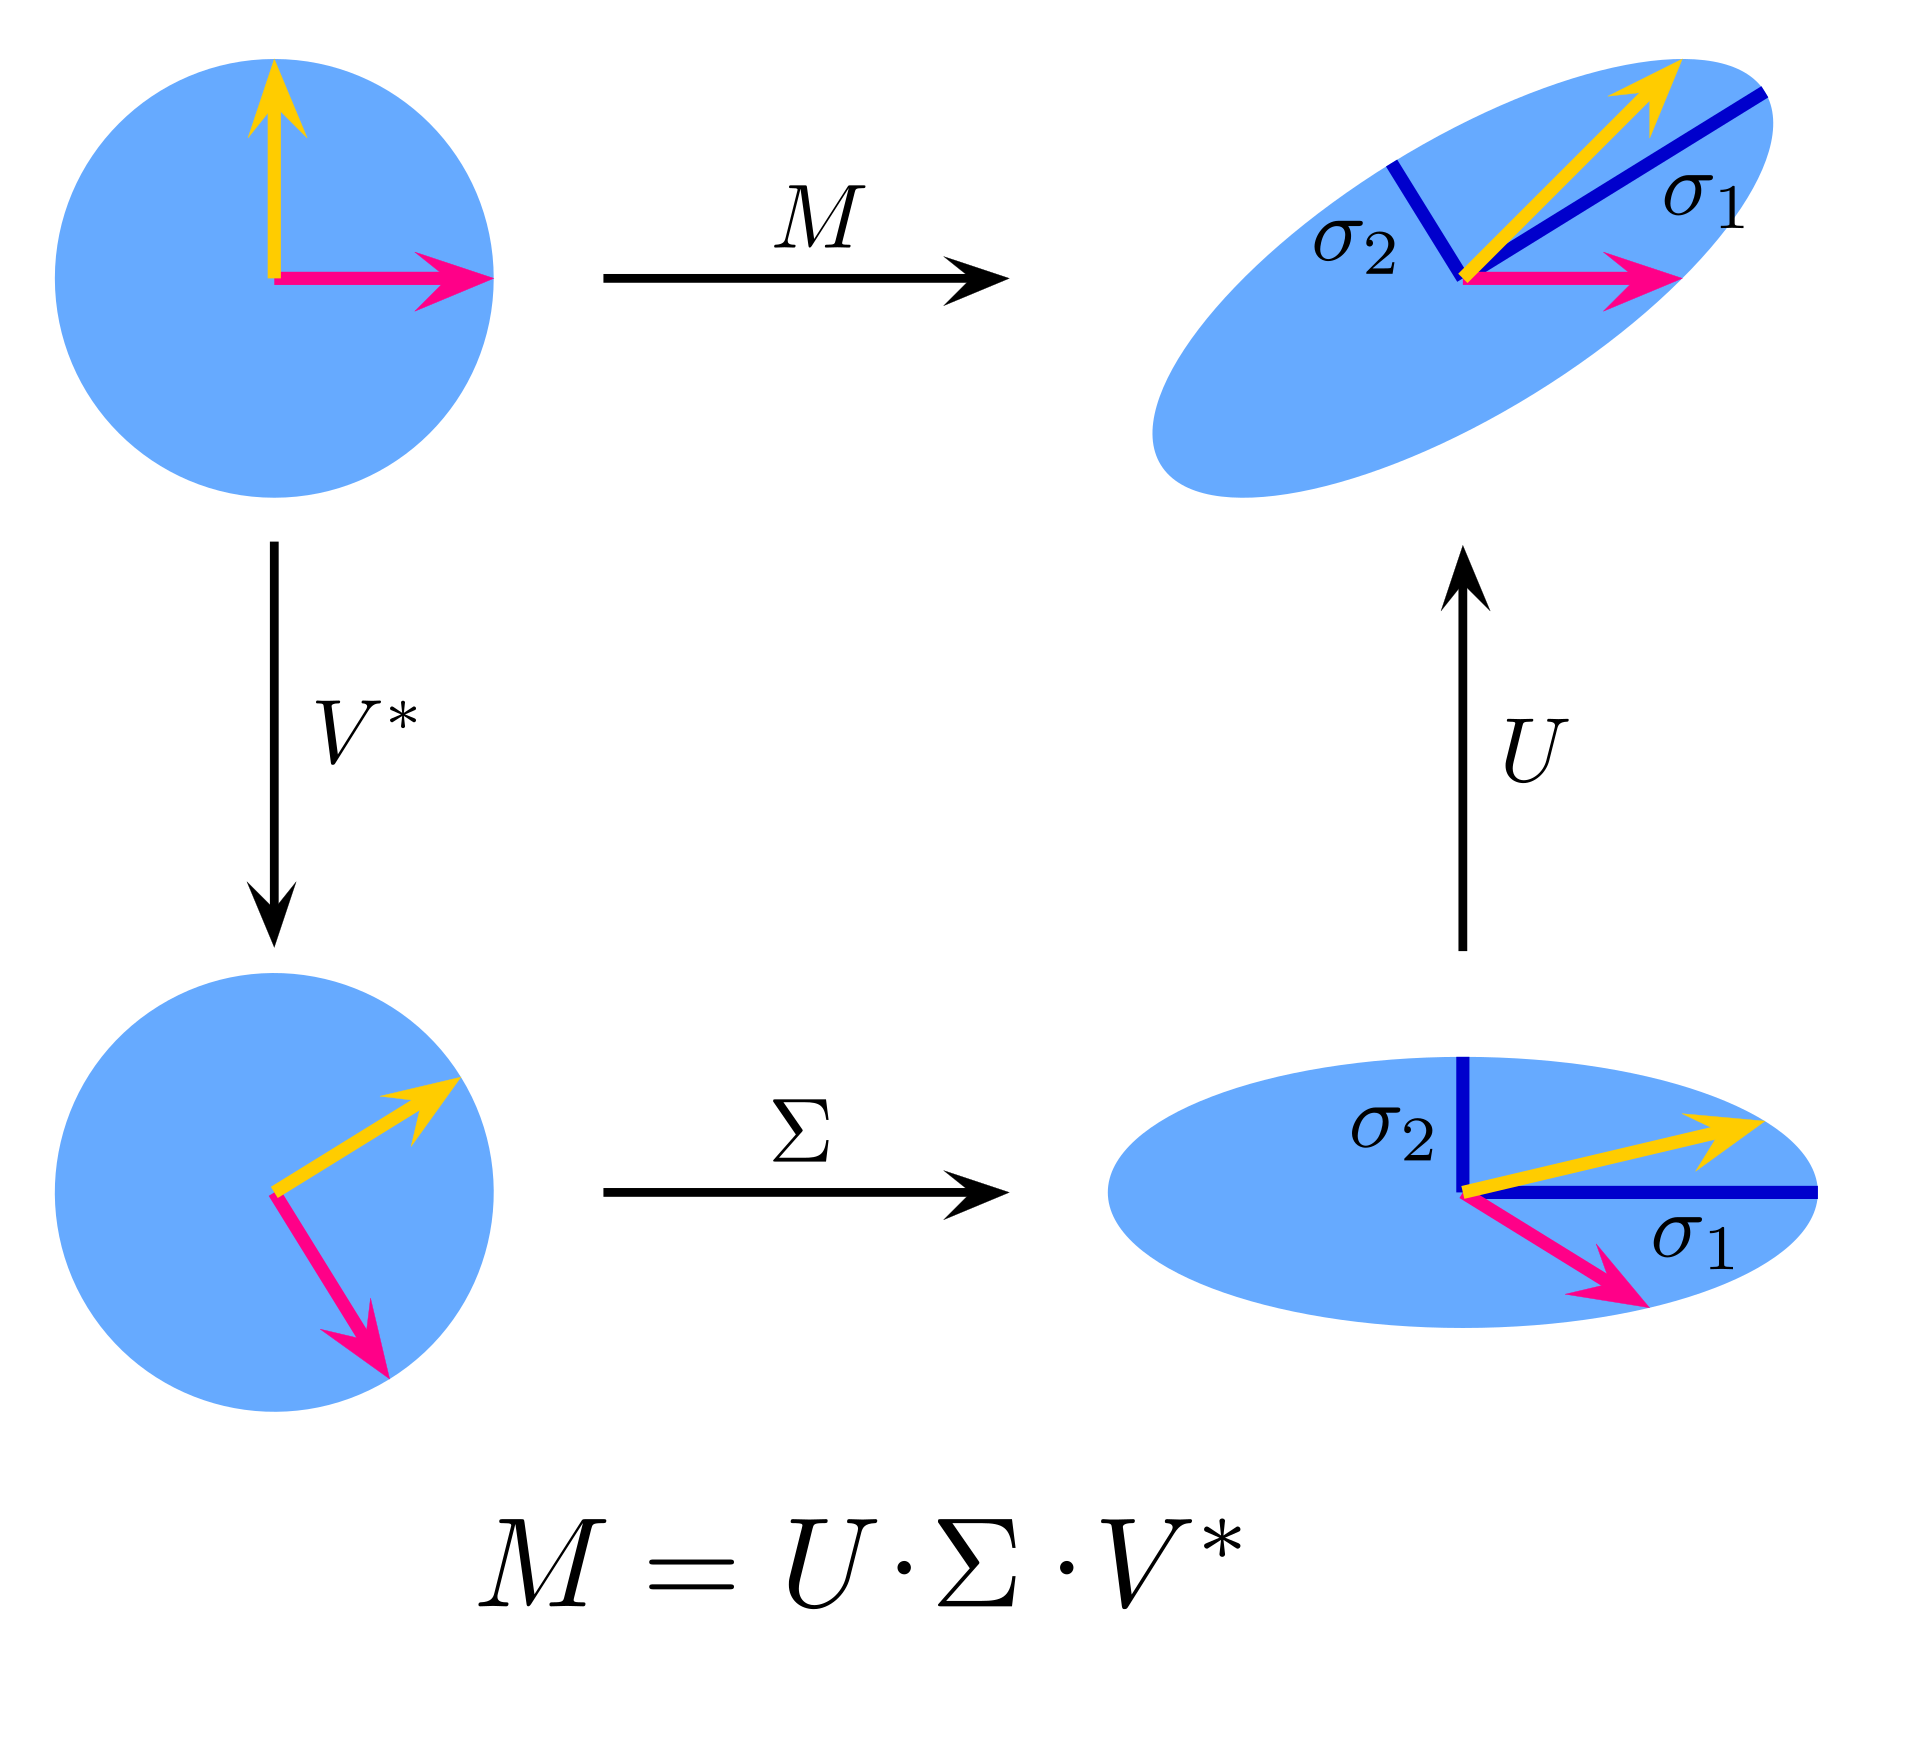

**Решение МНК через сингулярное разложение**

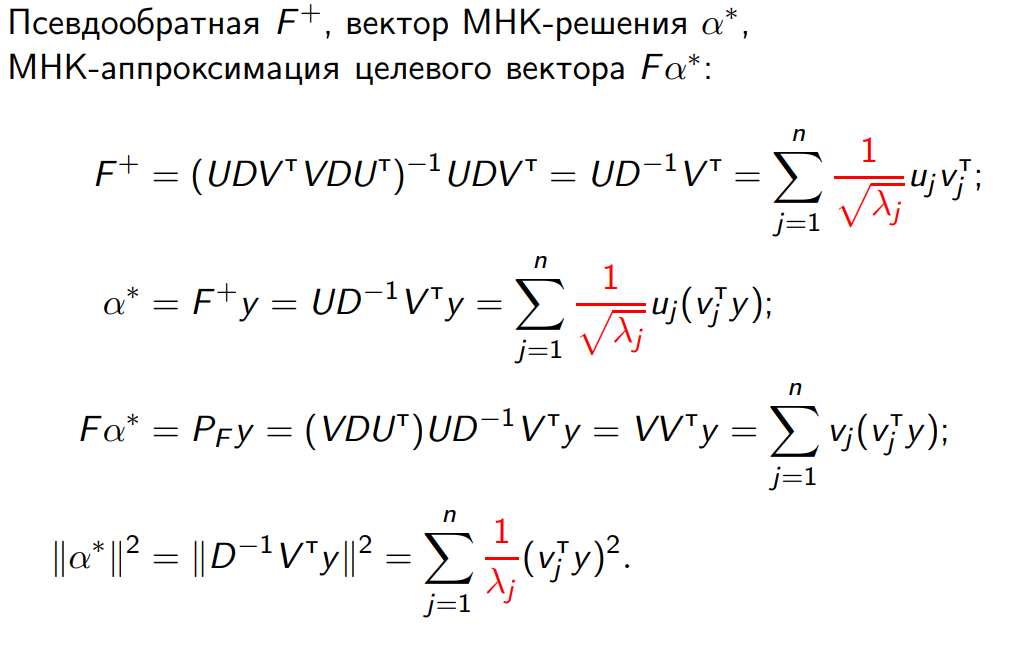

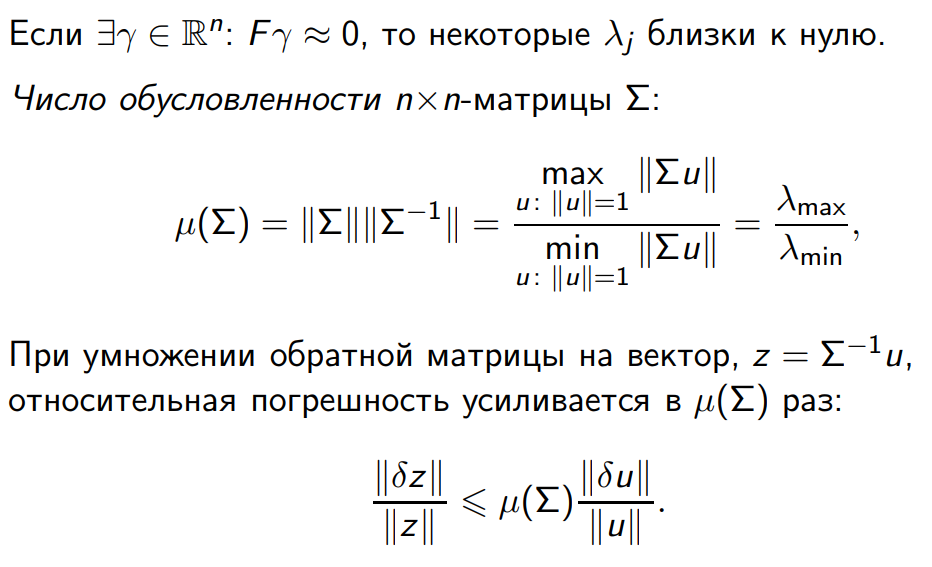

> Распишем подробнее **посмотреть числаки**

> ***Преблема мультиколлениарности и переобучения.***

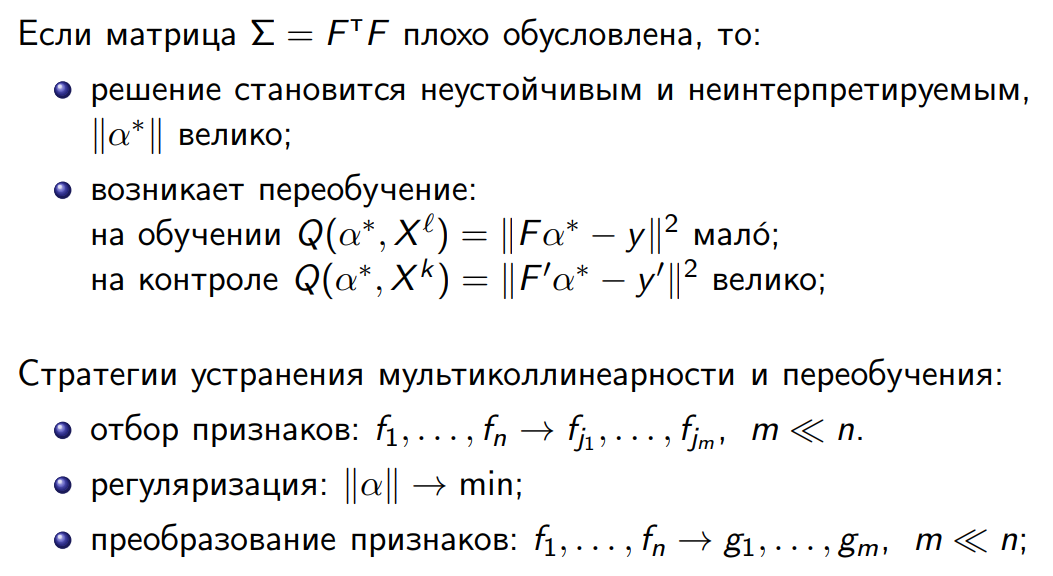

## Ridge регрессия (гребневая регрессия)

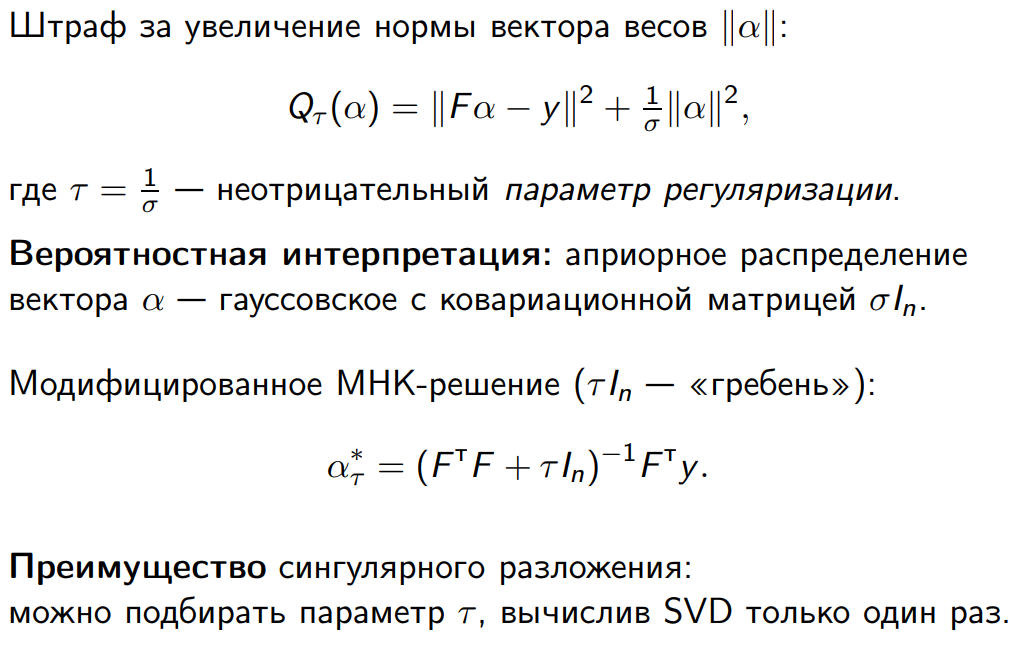

> Иллюстрация в матричном ввиде

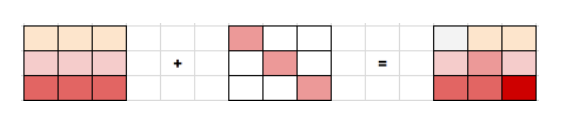

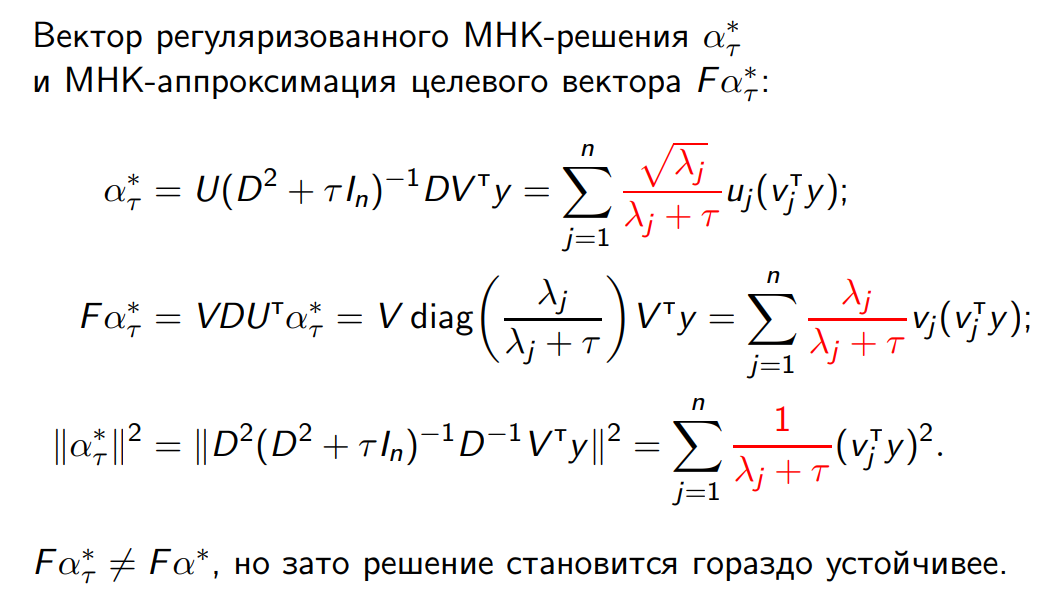

> Таким образом, увеличивая параметр регуляризации мы уменьшаем число обусловленности, а обусловленность задачи улучшается.

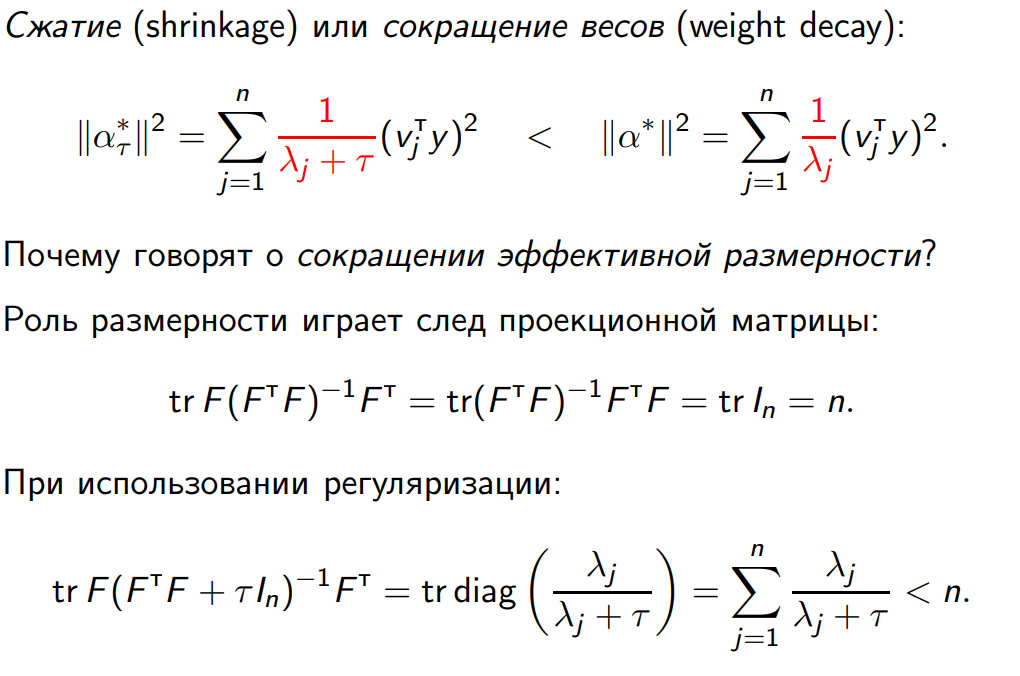

> Решение становится смещенныи. Минимизация нормы вектора параметров заставляет решение сдвигаться в сторону нуля.

***При удачном выборе распреления коэффициентов можно можно подучть Ridge и Lasso регрессии***

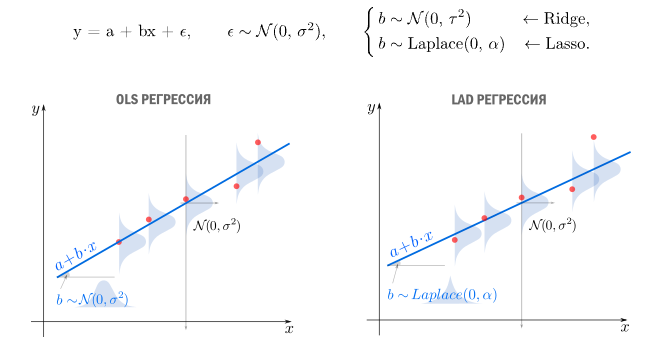

In [ ]:
#@title Sum of squared errors (SSE)

%%html

<html>

<head>
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script> 

  <script type="application/javascript">



    var xs = [];
    var ys = [];
    var x_min = -3.0;
    var y_min = -3.0;
    var x_max = +7.0;
    var y_max = +7.0;
    for (var x = x_min; x <= x_max; x += 0.1)
      xs.push(x);
    for (var y = y_min; y <= y_max; y += 0.1)
      ys.push(y);
    var sse = [];
    var sse_log = [];
    var lasso = [];
    var lasso_fake = [];
    var ridge = [];
    var ridge_fake = [];


    function loss_function_2d() {
      plot_potentials();
      return;
    }

  function plot_potentials() {
      elem = document.getElementById("reg_type");
      var regtype = elem.options[elem.selectedIndex].value;
      var reg_paint;
      if (regtype == 'lasso')
        reg_paint = lasso_fake;
      else
        reg_paint = ridge_fake;
      var alpha = get_current_alpha();
      var params = get_sse_params();
      var p = params[0];
      var ex = params[1];
      var ey = params[2];
      var cur_min = [0.0, 0.0];
      if (regtype == 'lasso')
        cur_min = l1_regularized_min(p, ex, ey, alpha);
      else
        cur_min = l2_regularized_min(p, ex, ey, alpha);
      var data_3d = [
      {
       type: 'surface', 
       x: xs,
       y: ys, 
       z: sse, 
       opacity: 0.8, 
       showscale: false,
       scene: 'scene',
       colorscale: 'Bluered'
      },
      {type: 'surface', 
       x: xs, 
       y: ys, 
       z: reg, 
       opacity: 0.8, 
       showscale: false,
       scene: 'scene',
       colorscale: 'Greens'
      }, 
      {type: 'surface',
       x: xs, 
       y: ys, 
       z: sum,
       opacity: 0.7, 
       showscale: false,
       scene: 'scene',
       colorscale : 'Hot'
      }
      ];
      var data = [/**/{
        x: xs,
        y: ys,
        z: sse_log, 
        showscale: false, 
        opacity: 0.9, 
        type: 'contour'
      },{
        x: xs,
        y: ys,
        z: reg_paint, 
        showscale: false, 
        opacity: 1.0, 
        type: 'contour',
        line: {
          width: 2,
          color: 'black'
        },
        contours: {
          coloring: 'none',
        }
      },{
        x: alpha_xs,
        y: alpha_ys,
        name: 'minima',
        mode: 'lines+markers',
        marker: {
          size: 5,
          opacity: 0.8
        },
        type: 'scatter'
      },{
        x: [cur_min[0]],
        y: [cur_min[1]],
        name: 'minimum',
        mode: 'markers',
        marker: {
          size: 7,
          opacity: 0.8,
          color: 'blue'
        },
        type: 'scatter'        
      }];

      if (document.getElementById("show_3d").checked)
        data = data.concat(data_3d);

      var cell_for_plot = document.getElementById("for_right_plot");

      var layout = {
          title: 'Regularization',
          scene: {
            domain: { 'x': [0.55, 1.0], 'y': [0.0, 1.0] }, 
            zaxis: {'range': [0, 100.0]},
            aspectmode: 'cube' 
          },
          xaxis1: {'range': [x_min, x_max], 'domain': [0.0, 0.44], 'fixedrange': true},
          yaxis1: {'range': [y_min, y_max], 'domain': [0.0, 1.0], 'fixedrange': true},
          width: 1200,
          height: 600,
          autosize: false,
          showlegend: false,
          margin: {l: 50, r: 50, b: 50, t: 50}
        };
      Plotly.newPlot(cell_for_plot, data, layout);
  }

    var reg = [];
    var sum = [];
    function recalc_regularization(alpha, type) {
      reg = [];
      sum = [];
      for (var i = 0; i < ys.length; ++i) {
        var y = ys[i];
        var temp = [];
        var temps = [];
        for (var j = 0; j < xs.length; ++j) {
          var x = xs[j];
          if (type == "lasso")
            e = alpha * (Math.abs(x) + Math.abs(y));
          else
            e = alpha * (x*x + y*y);
          temp.push(e);
          temps.push(e + sse[i][j]);
        }
        reg.push(temp);
        sum.push(temps);
      }
    }

    function get_current_alpha() {
      elem = document.getElementById("alpha_val");
      var alpha = parseFloat(elem.value);
      return alpha / 2.0;
    }

    function calculate() {
      var elem = document.getElementById("alpha_label");
      elem.innerHTML = get_current_alpha();
      elem = document.getElementById("reg_type");
      var regtype = elem.options[elem.selectedIndex].value;
      recalc_regularization(get_current_alpha(), regtype);
      recalc_sse();
      //loss_function_2d();
    }



    function error_reg(x, p, ex, ey, alpha) {
      var v = [x[0] - p[0], x[1] - p[1]];
      var a = v[0]*ex[0] + v[1]*ex[1];
      var b = v[0]*ey[0] + v[1]*ey[1];
      return a*a + b*b + alpha * (Math.abs(x[0]) + Math.abs(x[1]));
    }

    function l1_regularized_min(p, ex, ey, alpha) {
      denom = ex[1]*ey[0] - ex[0]*ey[1];
      denom *= 2 * denom;
      num1 = ex[0]*ex[1] + ey[0]*ey[1];
      num2 = ex[1]*ex[1] + ey[1]*ey[1];
      num3 = ex[0]*ex[0] + ey[0]*ey[0];
      denom1 = ex[1]*ex[1] + ey[1]*ey[1];
      denom2 = ex[0]*ex[0] + ey[0]*ey[0];

      var C = [
                [        p[0] + alpha * ( num1 - num2)/denom, p[1] + alpha * ( num1 - num3)/denom        ],
                [        p[0] + alpha * ( num1 + num2)/denom, p[1] + alpha * (-num1 - num3)/denom        ],
                [        p[0] + alpha * (-num1 - num2)/denom, p[1] + alpha * ( num1 + num3)/denom        ],
                [        p[0] + alpha * (-num1 + num2)/denom, p[1] + alpha * (-num1 + num3)/denom        ],
                [                                        0.0, p[1] + (p[0] * num1 - alpha / 2.0) / denom1],
                [                                        0.0, p[1] + (p[0] * num1 + alpha / 2.0) / denom1],
                [p[0] + (p[1] * num1 - alpha / 2.0) / denom2, 0.0                                        ],
                [p[0] + (p[1] * num1 + alpha / 2.0) / denom2, 0.0                                        ],
                [                                        0.0, 0.0                                        ]
      ];
      var res = [0, 0];
      var min = 100000000.0;
      for (var i = 0; i < C.length; ++i) {
        var err = error_reg(C[i], p, ex, ey, alpha);
        if (err < min) {
          min = err;
          res = C[i];
        }
      }
      return res;
      
    }

    function l2_regularized_min(p, ex, ey, alpha) {
      var mul1 = ex[1]*ey[0] - ex[0]*ey[1];
      var mul2 = ex[0]*ex[1] + ey[0]*ey[1];
      var mul3 = ex[0]*ex[0] + ey[0]*ey[0];
      var mul4 = ex[1]*ex[1] + ey[1]*ey[1];
      var denom = mul1*mul1 + alpha*(mul3 + mul4) + alpha*alpha;
      var num1 = mul1*mul1*p[0] + (mul3*p[0] + mul2*p[1])*alpha;
      var num2 = mul1*mul1*p[1] + (mul2*p[0] + mul4*p[1])*alpha;
      return [num1/denom, num2/denom];
    }

    var alpha_xs = [];
    var alpha_ys = [];
    function recalc_mins(p, ex, ey) {
      alpha_xs = [];
      alpha_ys = [];
      var elem = document.getElementById("reg_type");
      var regtype = elem.options[elem.selectedIndex].value;
      var f = null;
      if (regtype == 'lasso')
        f = l1_regularized_min;
      else
        f = l2_regularized_min;
      for (var alpha = 0.0; alpha <= 20.0; alpha += 0.5) {
        v = f(p, ex, ey, alpha);
        alpha_xs.push(v[0]);
        alpha_ys.push(v[1]);
      }


    }


    function get_sse_params() {
            var act_pt = active_pt;
      if (!active_pt)
        act_pt = all_pts[0];

      var canvas = document.getElementById("paint");
      var w = canvas.width;
      var h = canvas.height;
      var p = [act_pt[0] / w * (x_max - x_min) + x_min, (1.0 - act_pt[1] / h) * (y_max - y_min) + y_min];
      var ex = [(act_pt[3] - act_pt[0]) / w * (x_max - x_min), (act_pt[1] - act_pt[4]) / h * (y_max - y_min)];
      var ey = [(act_pt[5] - act_pt[0]) / w * (x_max - x_min), (act_pt[1] - act_pt[6]) / h * (y_max - y_min)];
      var lx2 = ex[0]*ex[0] + ex[1]*ex[1];
      var ly2 = ey[0]*ey[0] + ey[1]*ey[1];
      ex = [ex[0]/lx2, ex[1]/lx2];
      ey = [ey[0]/ly2, ey[1]/ly2];
      return [p, ex, ey]
    }


    
    function recalc_sse() {
      var params = get_sse_params();
      var p = params[0];
      var ex = params[1];
      var ey = params[2];

      sse = [];
      sse_log = [];
      for (var i = 0; i < xs.length; ++i) {
        var y = ys[i];
        var temp = [];
        var temp_log = [];
        var temps = [];
        for (var j = 0; j < ys.length; ++j) {
          var x = xs[j];
          var v = [x - p[0], y - p[1]];
          var a = v[0]*ex[0] + v[1]*ex[1];
          var b = v[0]*ey[0] + v[1]*ey[1];
          var e = a*a + b*b;
          temp.push(e);
          temp_log.push(Math.log(e + 1.0));
        }

        sse.push(temp);
        sse_log.push(temp_log);
      }

      recalc_mins(p, ex, ey);

      loss_function_2d();
      //loss_function_3d();
      //update_3d();
    }
    
    var active_pt = null;
    var all_pts = [];
    var ptR = 10.0;
    var debug_txt = "";

    function is_close(pt1, pt2) {
      return   (pt1[0] - pt2[0])*(pt1[0] - pt2[0])
            +  (pt1[1] - pt2[1])*(pt1[1] - pt2[1])
            <= ptR*ptR;
    }
  
    function circ(ctx, pos) {
      ctx.beginPath();
      if (pos[2] == 0) {
          ctx.fillStyle = 'rgba(128, 128, 128, 0.5)';
          ctx.arc(pos[0], pos[1], ptR, 0.0, 2.0 * Math.PI, 0);
          ctx.fill();
      } else {
          ctx.fillStyle = 'rgba(0, 208, 0, 1.0)'; //'rgba(0, 89, 208, 0.4)';
          ctx.fillRect(pos[0] - ptR, pos[1] - ptR, 2 * ptR, 2 * ptR);
          ctx.fillStyle = 'rgba(128, 0, 0, 1.0)';
          ctx.fillRect(pos[3] - ptR/2, pos[4] - ptR/2, ptR, ptR);
          ctx.fillRect(pos[5] - ptR/2, pos[6] - ptR/2, ptR, ptR);
          ctx.fillStyle = 'rgba(128, 0, 0, 0.1)';
          var rx = Math.sqrt((pos[4] - pos[1])*(pos[4] - pos[1]) + (pos[3] - pos[0])*(pos[3] - pos[0]));
          var ry = Math.sqrt((pos[6] - pos[1])*(pos[6] - pos[1]) + (pos[5] - pos[0])*(pos[5] - pos[0]));
          ctx.ellipse(pos[0], pos[1], rx, ry, Math.atan2(pos[4] - pos[1], pos[3] - pos[0]), 0, Math.PI * 2.0);
          ctx.fill();
      }
    }
    
    
    function draw() {
      var canvas = document.getElementById('paint');
      var plt_div = document.getElementById('for_right_plot');
      var el = plt_div.getElementsByClassName('plot')[0];
      var rect = el.getBoundingClientRect();
      canvas.style.cssText = "position:absolute; top:" + parseInt(rect.top)
                      + "px; left: " + parseInt(rect.left)
                      + "px; width:" + parseInt(rect.width)
                      + "px; height:" + parseInt(rect.height)
                      + "px; z-index:1000;";

      if (canvas.getContext) {
        var ctx = canvas.getContext('2d');
        
        ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
        ctx.strokeStyle = 'black';
        ctx.lineWidth = 4.0;
        ctx.strokeRect(0, 0, canvas.width, canvas.height); // field
        
        ctx.font = '20px serif';
        ctx.fillStyle = 'black';
        ctx.fillText(debug_txt, 200, 200);
        
        if (active_pt) {
          circ(ctx, active_pt);
        }
        all_pts.forEach(function (item, index) {
          circ(ctx, item);

        });
        //circ(ctx, all_pts[0]);


      }
    }
    
    var timer

    function mdown_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      idx = -1;
      var item = all_pts[0];
      var index = 0;
      //all_pts.forEach(function (item, index) {
        if (is_close([x,y], [item[0], item[1]])) {
          idx = index;
        if (item[2] == 1)
            item[7] = 0;
        }
        if (item[2] == 1 && is_close([x,y], [item[3], item[4]])) {
          item[7] = 1;
          idx = index;
        }
        if (item[2] == 1 && is_close([x,y], [item[5], item[6]])) {
          item[7] = 2;
          idx = index;
        }
      //});
      if (idx <= -1)
          return;

    active_pt = all_pts[idx];
    all_pts.splice(idx, 1);
    draw();
    }
    
    function mmove_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      if (active_pt) {
        if (active_pt[2] == 0) {
          active_pt[0] = x;
          active_pt[1] = y;
        }
        if (active_pt[2] == 1) {
          if (active_pt[7] == 0) {
              active_pt[3] += x - active_pt[0];
              active_pt[4] += y - active_pt[1];
              active_pt[5] += x - active_pt[0];
              active_pt[6] += y - active_pt[1];
              active_pt[0] = x;
            active_pt[1] = y;
            }
            if (active_pt[7] == 1) {
              active_pt[3] = x;
              active_pt[4] = y;
              var v_x = active_pt[3] - active_pt[0];
              var v_y = active_pt[4] - active_pt[1];
              var r = Math.sqrt(v_x*v_x + v_y*v_y);
              var u_x = active_pt[5] - active_pt[0];
              var u_y = active_pt[6] - active_pt[1];
              var R = Math.sqrt(u_x*u_x + u_y*u_y);
              active_pt[5] = active_pt[0] - v_y / r * R;
              active_pt[6] = active_pt[1] + v_x / r * R;
            }
            if (active_pt[7] == 2) {
              active_pt[5] = x;
              active_pt[6] = y;
              var v_x = active_pt[3] - active_pt[0];
              var v_y = active_pt[4] - active_pt[1];
              var r = Math.sqrt(v_x*v_x + v_y*v_y);
              var u_x = active_pt[5] - active_pt[0];
              var u_y = active_pt[6] - active_pt[1];
              var R = Math.sqrt(u_x*u_x + u_y*u_y);
              active_pt[3] = active_pt[0] + u_y / R * r;
              active_pt[4] = active_pt[1] - u_x / R * r;

            }         
        }
        //recalc_sse();
        calculate();
      }
      draw();
      //update_3d();
    }
    
    function mup_handle(evt) {
      evt.stopPropagation();
      x = evt.offsetX;
      y = evt.offsetY;
      if (x >= 600) {
        active_pt = null;
      }
      if (active_pt) {
        //all_pts.push(active_pt);
        all_pts = [active_pt];
        active_pt = null;
        recalc_sse();
        //regenerate();
      }
      draw();
      //loss_function_3d();
    }

  </script>
</head>



<div id="everything" style="height:600px; width:1200px;">
  <table>
    <tr>
      <td>α</td>
      <td><input type="range" class="slider" min = "0" max = "40" value="3" id="alpha_val" oninput="calculate();"></td>
      <td><div id="alpha_label" >3</div></td>
      <td>Regularization:</td>
      <td>
        <select id="reg_type" onchange="calculate()">
        <option value="ridge">Ridge</option>
        <option value="lasso">Lasso</option>
        </select>
      </td>
      <td>
        show 3D (heavy calculations):
        <input type="checkbox" id="show_3d" onchange="loss_function_2d();">
      </td>
    </tr>
  </table>
  <div id="for_right_plot">
  </div>
</div>


  <canvas id="paint" width=600 height=600
    onmousedown="mdown_handle(event)"
    onmousemove="mmove_handle(event)"
    onmouseup="mup_handle(event)">
  </canvas>


<script>
function init()
{
  // update fake regularization functions
  ridge_fake = [];
  lasso_fake = [];
  for (var i = 0; i < xs.length; ++i) {
    var y = ys[i];
    var temp_r = [];
    var temp_l = [];
    for (var j = 0; j < ys.length; ++j) {
      var x = xs[j];
      temp_l.push(2.0 * (Math.abs(x) + Math.abs(y)));
      temp_r.push(Math.sqrt(x*x + y*y));
    }
    ridge_fake.push(temp_r);
    lasso_fake.push(temp_l);
  }
  // setup point params
  active_pt = null;
  var x = 300;
  var y = 300;
  all_pts = [[x, y, 1, x + 20, y, x, y + 20, 0]];
  loss_function_2d();
  // setup canvas
  var plt_div = document.getElementById('for_right_plot');
  var el = plt_div.getElementsByClassName('plot')[0];
  var rect = el.getBoundingClientRect();
  var canvas = document.getElementById("paint");
  console.log(rect.top);
  canvas.style.cssText = "position:absolute; top:" + parseInt(rect.top)
                      + "px; left: " + parseInt(rect.left)
                      + "px; width:" + parseInt(rect.width)
                      + "px; height:" + parseInt(rect.height)
                      + "px; z-index:1000;";
  canvas.width = rect.width;
  canvas.height = rect.height;
  //el.appendChild(canvas);
  var ctx = canvas.getContext('2d');
  ctx.clearRect(0, 0, canvas.width, canvas.height); // cleanup before start
  recalc_sse();
  draw();
  //loss_function_3d();
  calculate();
  //update_3d();
  
  //timer = setInterval(update_3d, 2000);
}
init();
</script>

</html>


SyntaxError: invalid decimal literal (Temp/ipykernel_15040/1313911021.py, line 508)